In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import pickle
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import f_classif
from itertools import combinations
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier

import cupy as cp
import cudf
from cuml.linear_model import LogisticRegression as cuMLLogisticRegression


print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))
%load_ext autoreload
%autoreload 2

from src.common.utils import load_config_file
from src.embeddings.embeddings_utils import load_embeddings
from src.analysis.analyzer_multiplex_markers import AnalyzerMultiplexMarkers
from utils import *

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA


Train dataset
batches [2, 3, 7, 8, 9, 10]
(41469,) (41469, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Test dataset
batches [1]
(10932,) (10932, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
FUSRevertant_Untreated: 1015
OPTN_Untreated: 2314
TBK1_Untreated: 1876
TDP43_Untreated: 1699
WT_Untreated: 1561
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.66      0.91      0.76      1222
  FUSHomozygous_Untreated       0.87      0.53      0.66      1245
   FUSRevertant_Untreated

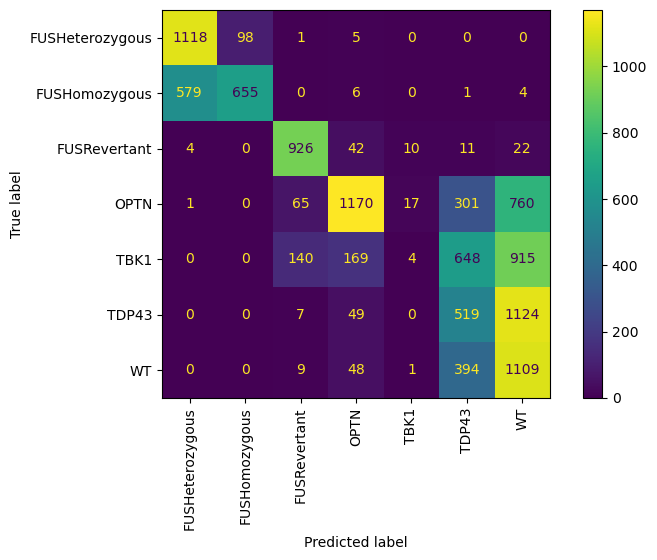

Train dataset
batches [1, 3, 7, 8, 9, 10]
(44045,) (44045, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
FUSRevertant_Untreated: 4696
OPTN_Untreated: 8200
TBK1_Untreated: 4861
TDP43_Untreated: 7796
WT_Untreated: 8526
Test dataset
batches [2]
(8356,) (8356, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1231
FUSHomozygous_Untreated: 1162
FUSRevertant_Untreated: 800
OPTN_Untreated: 1649
TBK1_Untreated: 1220
TDP43_Untreated: 1508
WT_Untreated: 786
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.63      0.64      0.63      1231
  FUSHomozygous_Untreated       0.61      0.58      0.60      1162
   FUSRevertant_Untreated    

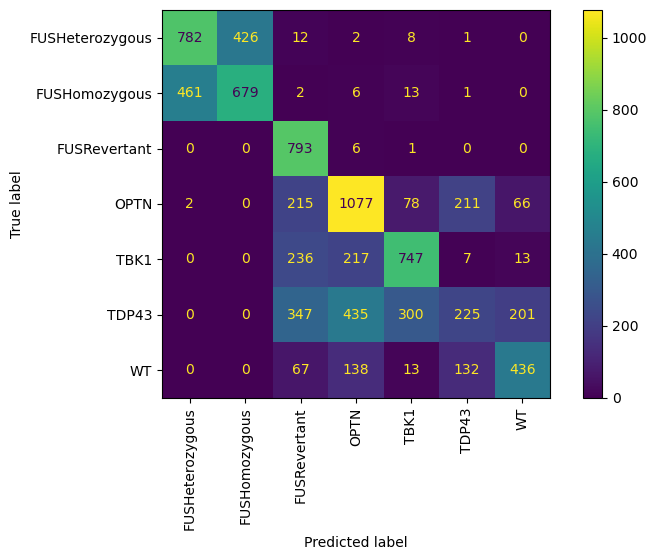

Train dataset
batches [1, 2, 7, 8, 9, 10]
(45470,) (45470, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5276
FUSHomozygous_Untreated: 5279
FUSRevertant_Untreated: 4365
OPTN_Untreated: 8746
TBK1_Untreated: 5036
TDP43_Untreated: 8374
WT_Untreated: 8394
Test dataset
batches [3]
(6931,) (6931, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1004
FUSHomozygous_Untreated: 800
FUSRevertant_Untreated: 1131
OPTN_Untreated: 1103
TBK1_Untreated: 1045
TDP43_Untreated: 930
WT_Untreated: 918
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.74      0.97      0.84      1004
  FUSHomozygous_Untreated       0.94      0.57      0.71       800
   FUSRevertant_Untreated     

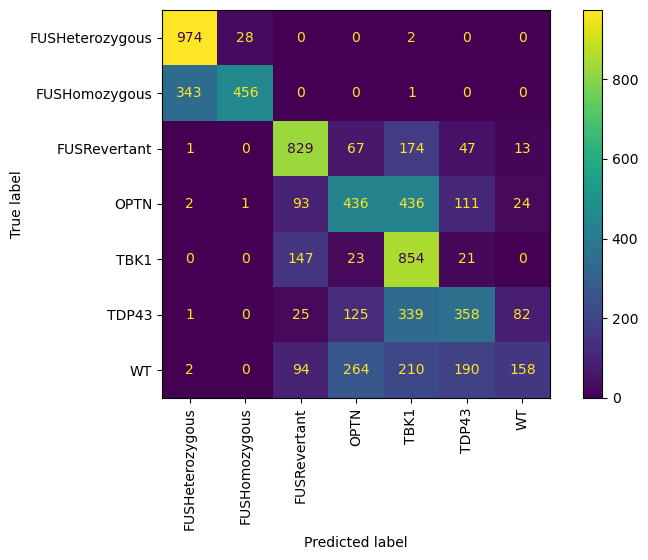

Train dataset
batches [1, 2, 3, 8, 9, 10]
(52238,) (52238, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 6254
FUSHomozygous_Untreated: 6054
FUSRevertant_Untreated: 5452
OPTN_Untreated: 9844
TBK1_Untreated: 6068
TDP43_Untreated: 9291
WT_Untreated: 9275
Test dataset
batches [7]
(163,) (163, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 26
FUSHomozygous_Untreated: 25
FUSRevertant_Untreated: 44
OPTN_Untreated: 5
TBK1_Untreated: 13
TDP43_Untreated: 13
WT_Untreated: 37
fit
predict


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.00      0.00      0.00        26
  FUSHomozygous_Untreated       0.00      0.00      0.00        25
   FUSRevertant_Untreated       0.00      0.00      0.00        44
           OPTN_Untreated       0.07      0.80      0.12         5
           TBK1_Untreated       0.50      0.08      0.13        13
          TDP43_Untreated       0.07      0.23      0.11        13
             WT_Untreated       0.61      0.97      0.75        37

                 accuracy                           0.27       163
                macro avg       0.18      0.30      0.16       163
             weighted avg       0.19      0.27      0.19       163



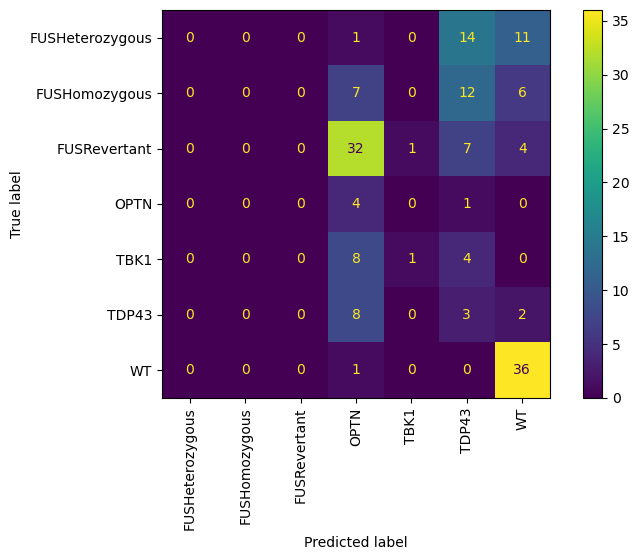

Train dataset
batches [1, 2, 3, 7, 9, 10]
(42851,) (42851, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Test dataset
batches [8]
(9550,) (9550, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
FUSRevertant_Untreated: 1163
OPTN_Untreated: 1429
TBK1_Untreated: 755
TDP43_Untreated: 1564
WT_Untreated: 1510
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.81      0.19      0.31      1567
  FUSHomozygous_Untreated       0.54      0.95      0.69      1562
   FUSRevertant_Untreated   

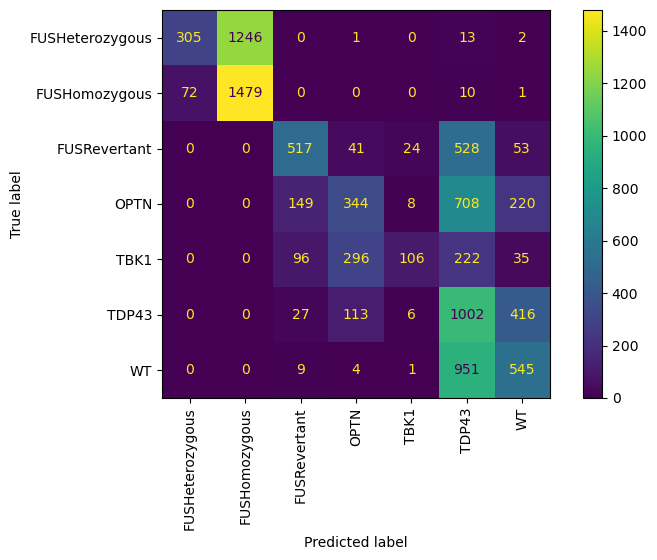

Train dataset
batches [1, 2, 3, 7, 8, 10]
(43208,) (43208, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
FUSRevertant_Untreated: 4198
OPTN_Untreated: 8263
TBK1_Untreated: 5097
TDP43_Untreated: 7865
WT_Untreated: 7008
Test dataset
batches [9]
(9193,) (9193, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 963
FUSHomozygous_Untreated: 619
FUSRevertant_Untreated: 1298
OPTN_Untreated: 1586
TBK1_Untreated: 984
TDP43_Untreated: 1439
WT_Untreated: 2304
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.19      0.27      0.22       963
  FUSHomozygous_Untreated       0.28      0.54      0.37       619
   FUSRevertant_Untreated     

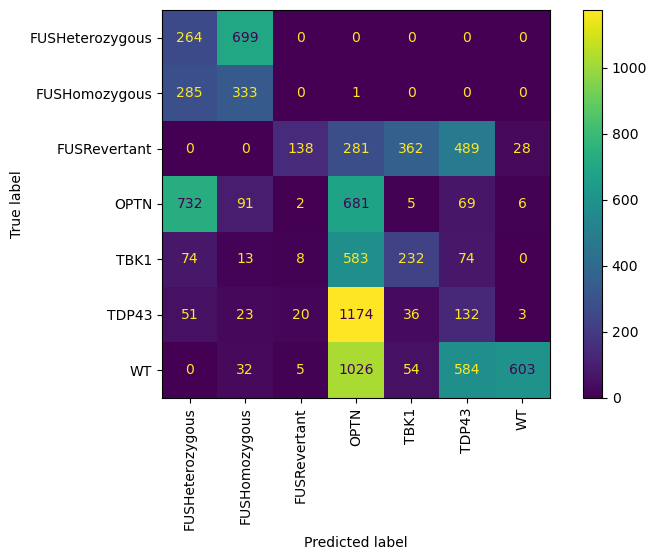

Train dataset
batches [1, 2, 3, 7, 8, 9]
(45125,) (45125, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116
Test dataset
batches [10]
(7276,) (7276, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 267
FUSHomozygous_Untreated: 666
FUSRevertant_Untreated: 45
OPTN_Untreated: 1763
TBK1_Untreated: 188
TDP43_Untreated: 2151
WT_Untreated: 2196
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.58      0.21      0.31       267
  FUSHomozygous_Untreated       0.75      0.94      0.84       666
   FUSRevertant_Untreated       

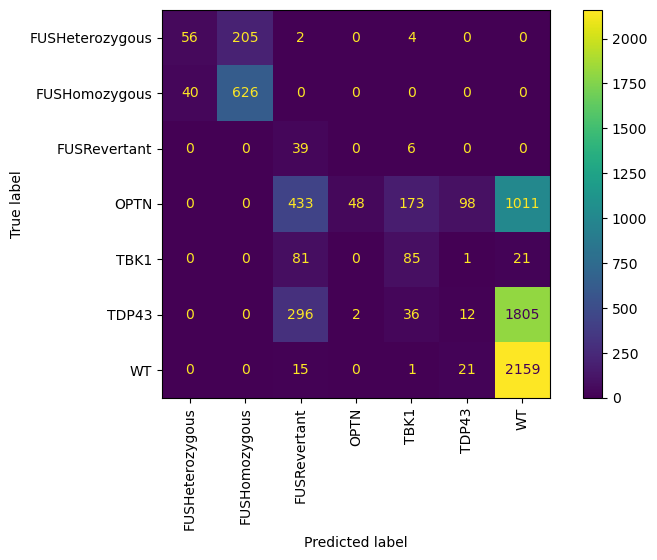

0.43597069158017904 [0.5032016099524332, 0.5671373863092388, 0.5864954552012697, 0.26993865030674846, 0.4500523560209424, 0.2592189709561623, 0.4157504123144585]


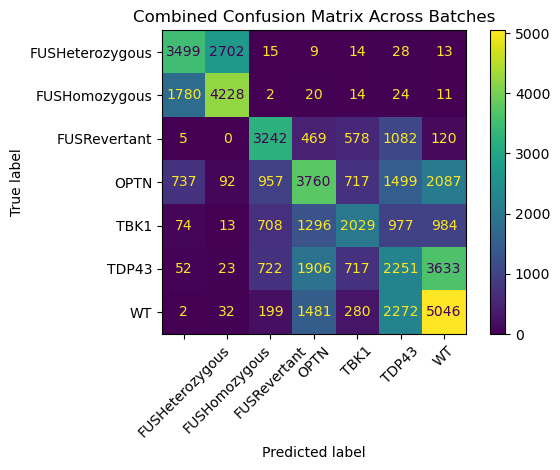

In [18]:
## Baseline

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

for test_batches in batches:
    test_batches = [test_batches]
    train_batches = list(set(batches)-set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train), np.shape(X_train), np.unique(y_train))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test), np.shape(X_test), np.unique(y_test))
    count_labels(y_test)

    # Encode with same label encoder
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    # Optional: balance training set
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_enc = ros.fit_resample(X_train, y_train_enc)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Convert to GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_enc = cudf.Series(y_train_enc)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_enc)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_enc, y_pred, target_names=le.classes_, output_dict=True)
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))    
    plot_confusion_matrix(y_test_enc, y_pred, le)
    accuracy = report['accuracy']
    accuracies.append(accuracy)
    # Accumulate confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred, labels=np.arange(len(le.classes_)))
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm
print(np.mean(accuracies), accuracies)
display_labels = [label.replace('_Untreated', '') for label in le.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=display_labels)
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(41469,) (41469, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Test dataset
batches [1]
(10932,) (10932, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
FUSRevertant_Untreated: 1015
OPTN_Untreated: 2314
TBK1_Untreated: 1876
TDP43_Untreated: 1699
WT_Untreated: 1561
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.60      0.93      0.73      1222
  FUSHomozygous_Untreated       0.86      0.39      0.54      1245
   FUSRevertant_Untreated

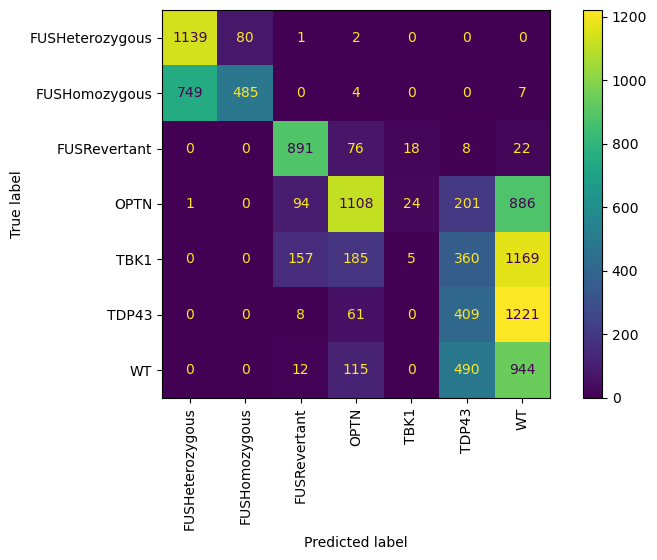

Train dataset
batches [1, 3, 7, 8, 9, 10]
(44045,) (44045, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
FUSRevertant_Untreated: 4696
OPTN_Untreated: 8200
TBK1_Untreated: 4861
TDP43_Untreated: 7796
WT_Untreated: 8526
Test dataset
batches [2]
(8356,) (8356, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1231
FUSHomozygous_Untreated: 1162
FUSRevertant_Untreated: 800
OPTN_Untreated: 1649
TBK1_Untreated: 1220
TDP43_Untreated: 1508
WT_Untreated: 786
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.61      0.59      0.60      1231
  FUSHomozygous_Untreated       0.60      0.57      0.58      1162
   FUSRevertant_Untreated    

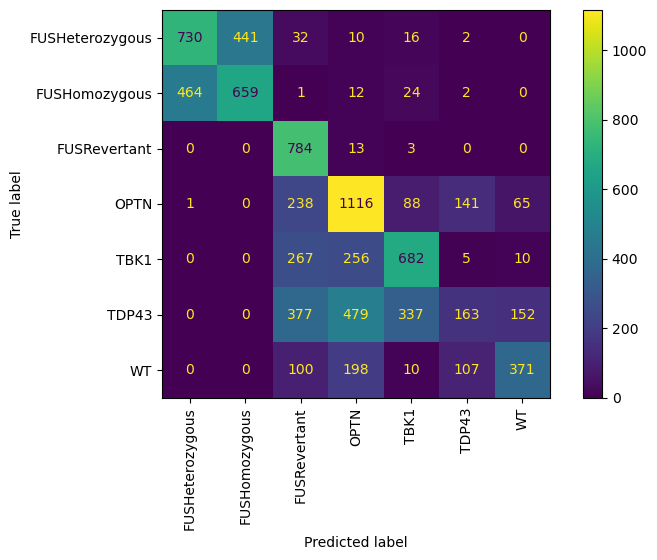

Train dataset
batches [1, 2, 7, 8, 9, 10]
(45470,) (45470, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5276
FUSHomozygous_Untreated: 5279
FUSRevertant_Untreated: 4365
OPTN_Untreated: 8746
TBK1_Untreated: 5036
TDP43_Untreated: 8374
WT_Untreated: 8394
Test dataset
batches [3]
(6931,) (6931, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1004
FUSHomozygous_Untreated: 800
FUSRevertant_Untreated: 1131
OPTN_Untreated: 1103
TBK1_Untreated: 1045
TDP43_Untreated: 930
WT_Untreated: 918
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.73      0.95      0.82      1004
  FUSHomozygous_Untreated       0.91      0.56      0.69       800
   FUSRevertant_Untreated     

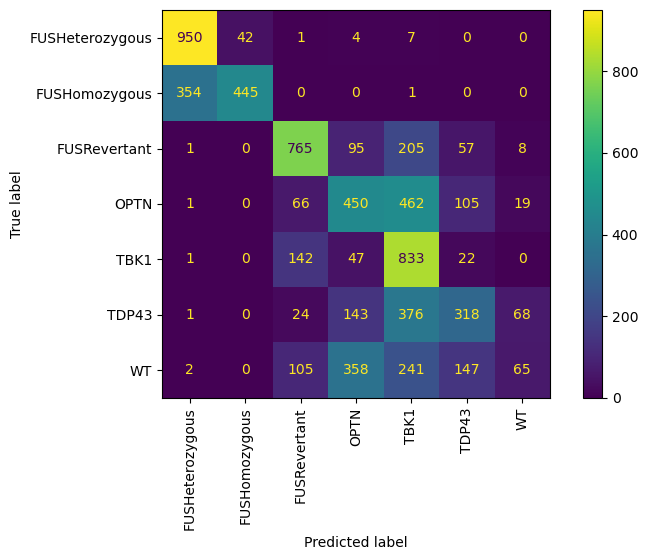

Train dataset
batches [1, 2, 3, 8, 9, 10]
(52238,) (52238, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 6254
FUSHomozygous_Untreated: 6054
FUSRevertant_Untreated: 5452
OPTN_Untreated: 9844
TBK1_Untreated: 6068
TDP43_Untreated: 9291
WT_Untreated: 9275
Test dataset
batches [7]
(163,) (163, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 26
FUSHomozygous_Untreated: 25
FUSRevertant_Untreated: 44
OPTN_Untreated: 5
TBK1_Untreated: 13
TDP43_Untreated: 13
WT_Untreated: 37
fit
predict


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.00      0.00      0.00        26
  FUSHomozygous_Untreated       0.00      0.00      0.00        25
   FUSRevertant_Untreated       0.00      0.00      0.00        44
           OPTN_Untreated       0.06      1.00      0.11         5
           TBK1_Untreated       1.00      0.08      0.14        13
          TDP43_Untreated       0.05      0.15      0.08        13
             WT_Untreated       0.76      0.86      0.81        37

                 accuracy                           0.25       163
                macro avg       0.27      0.30      0.16       163
             weighted avg       0.26      0.25      0.21       163



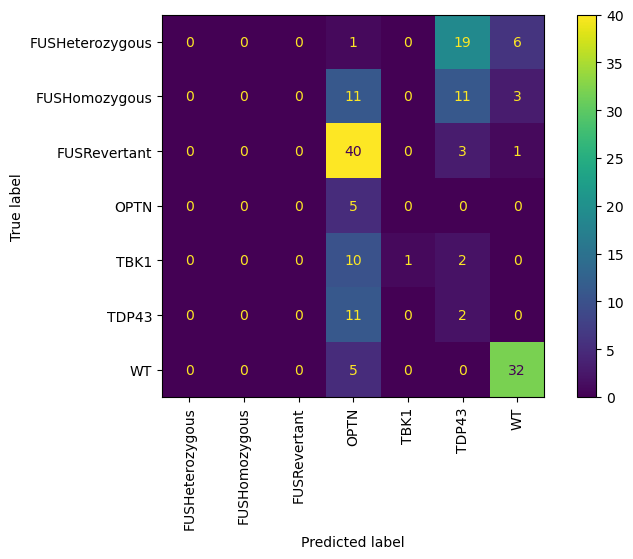

Train dataset
batches [1, 2, 3, 7, 9, 10]
(42851,) (42851, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Test dataset
batches [8]
(9550,) (9550, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
FUSRevertant_Untreated: 1163
OPTN_Untreated: 1429
TBK1_Untreated: 755
TDP43_Untreated: 1564
WT_Untreated: 1510
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.81      0.13      0.22      1567
  FUSHomozygous_Untreated       0.53      0.95      0.68      1562
   FUSRevertant_Untreated   

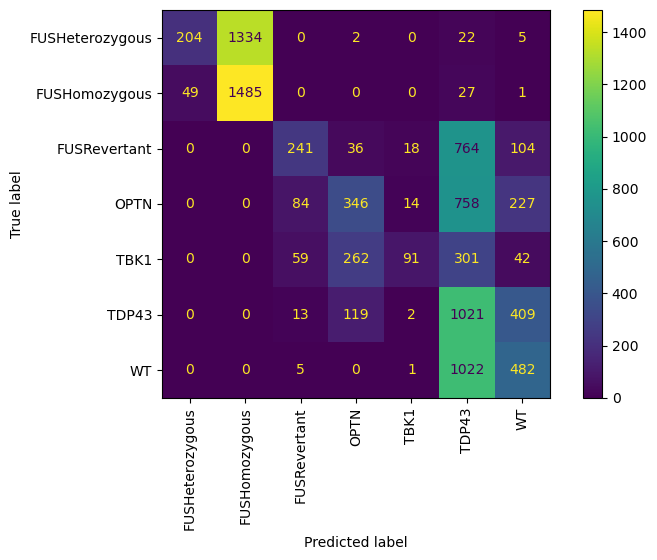

Train dataset
batches [1, 2, 3, 7, 8, 10]
(43208,) (43208, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
FUSRevertant_Untreated: 4198
OPTN_Untreated: 8263
TBK1_Untreated: 5097
TDP43_Untreated: 7865
WT_Untreated: 7008
Test dataset
batches [9]
(9193,) (9193, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 963
FUSHomozygous_Untreated: 619
FUSRevertant_Untreated: 1298
OPTN_Untreated: 1586
TBK1_Untreated: 984
TDP43_Untreated: 1439
WT_Untreated: 2304
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.13      0.16      0.14       963
  FUSHomozygous_Untreated       0.29      0.63      0.40       619
   FUSRevertant_Untreated     

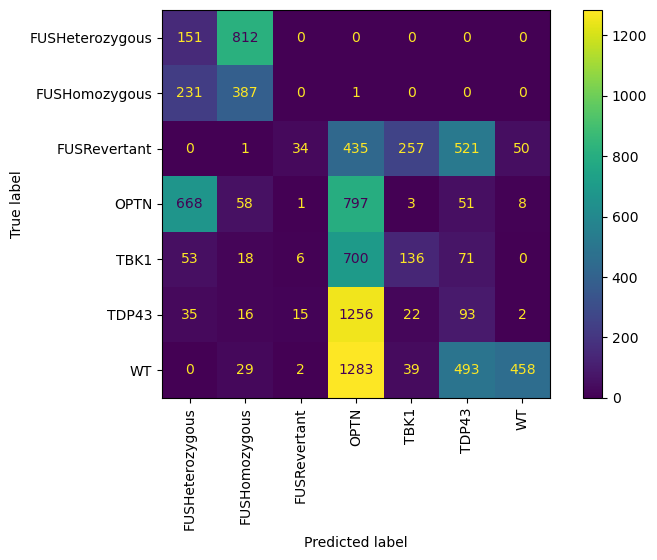

Train dataset
batches [1, 2, 3, 7, 8, 9]
(45125,) (45125, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116
Test dataset
batches [10]
(7276,) (7276, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 267
FUSHomozygous_Untreated: 666
FUSRevertant_Untreated: 45
OPTN_Untreated: 1763
TBK1_Untreated: 188
TDP43_Untreated: 2151
WT_Untreated: 2196
fit
predict
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.60      0.34      0.43       267
  FUSHomozygous_Untreated       0.78      0.91      0.84       666
   FUSRevertant_Untreated       

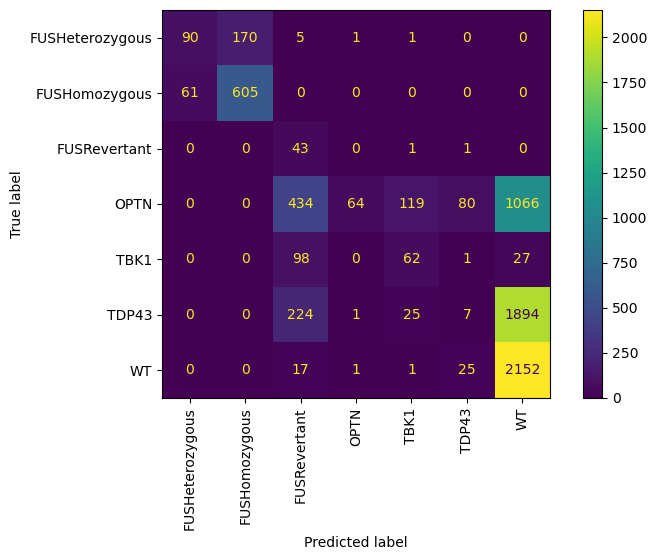

0.4052199180119422 [0.4556348335162825, 0.5391335567257061, 0.55201269658058, 0.24539877300613497, 0.40523560209424087, 0.22364842815185468, 0.41547553600879605]


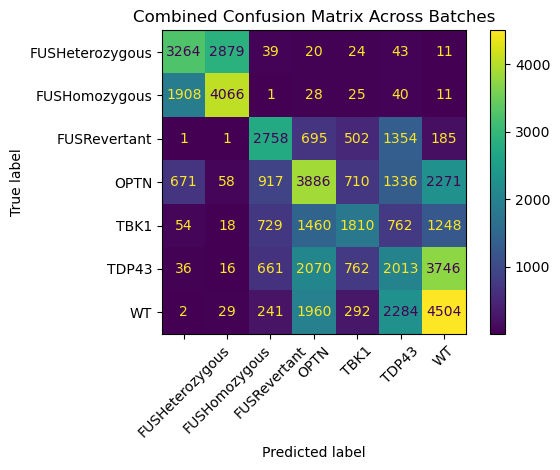

In [5]:
## L2 norm => doesnt improve

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

for test_batches in batches:
    test_batches = [test_batches]
    train_batches = list(set(batches)-set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)
    
    # L2 normalize each sample
    X_train /= np.linalg.norm(X_train, axis=1, keepdims=True)
    X_test /= np.linalg.norm(X_test, axis=1, keepdims=True)

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train), np.shape(X_train), np.unique(y_train))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test), np.shape(X_test), np.unique(y_test))
    count_labels(y_test)

    # Encode with same label encoder
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    # Optional: balance training set
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_enc = ros.fit_resample(X_train, y_train_enc)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Convert to GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_enc = cudf.Series(y_train_enc)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_enc)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_enc, y_pred, target_names=le.classes_, output_dict=True)
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))    
    plot_confusion_matrix(y_test_enc, y_pred, le)
    accuracy = report['accuracy']
    accuracies.append(accuracy)
    # Accumulate confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred, labels=np.arange(len(le.classes_)))
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm
print(np.mean(accuracies), accuracies)
display_labels = [label.replace('_Untreated', '') for label in le.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=display_labels)
disp.plot(xticks_rotation=45)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

In [13]:
all_probs = []
batches = [1,2,3,8,9,10]

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train), np.shape(X_train), np.unique(y_train))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test), np.shape(X_test), np.unique(y_test))
    count_labels(y_test)

    # Encode
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    class_names = le.classes_

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_enc = ros.fit_resample(X_train, y_train_enc)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_enc = cudf.Series(y_train_enc)

    probs_per_batch = {}

    for class_index, class_name in enumerate(class_names):
        y_binary = (y_train_enc == class_index).astype(int)
        y_binary = cudf.Series(y_binary)

        clf = cuMLLogisticRegression(verbose=0)
        clf.fit(X_train, y_binary)

        probas = clf.predict_proba(X_test).to_numpy()[:, 1]
        probs_per_batch[class_name] = probas

    df_probs = pd.DataFrame(probs_per_batch)
    df_probs["true_label"] = [class_names[i] for i in y_test_enc]
    df_probs["test_batch"] = test_batch

    all_probs.append(df_probs)

results_df = pd.concat(all_probs, ignore_index=True)

Train dataset
batches [2, 3, 8, 9, 10]
(41306,) (41306, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5032
FUSHomozygous_Untreated: 4809
FUSRevertant_Untreated: 4437
OPTN_Untreated: 7530
TBK1_Untreated: 4192
TDP43_Untreated: 7592
WT_Untreated: 7714
Test dataset
batches [1]
(10932,) (10932, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
FUSRevertant_Untreated: 1015
OPTN_Untreated: 2314
TBK1_Untreated: 1876
TDP43_Untreated: 1699
WT_Untreated: 1561
Train dataset
batches [1, 3, 8, 9, 10]
(43882,) (43882, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 502

In [15]:
# Get the label with max probability per row
results_df["pred_label"] = results_df[class_names].idxmax(axis=1)

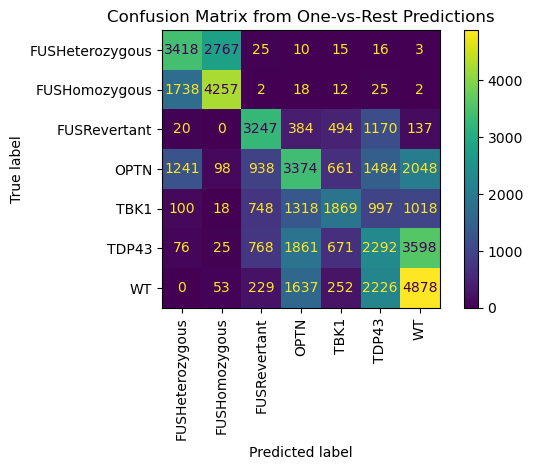

In [20]:
cm = confusion_matrix(results_df["true_label"], results_df["pred_label"], labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[l.replace('_Untreated', '') for l in class_names])
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix from One-vs-Rest Predictions")
plt.tight_layout()
plt.show()

In [29]:
all_probs = []
batches = [1,2,3,8,9,10]

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train), np.shape(X_train), np.unique(y_train))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test), np.shape(X_test), np.unique(y_test))
    count_labels(y_test)

    # Encode
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    class_names = le.classes_

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    probs_per_batch = {}
    X_test = cudf.DataFrame.from_records(X_test)

    for class_index, class_name in enumerate(class_names):
        y_binary = (y_train_enc == class_index).astype(int)
        
        # Optional: balance
        balance = True
        if balance:
            ros = RandomOverSampler(random_state=42)
            X_traini, y_binary = ros.fit_resample(X_train, y_binary)
            
        # To GPU
        X_traini = cudf.DataFrame.from_records(X_traini)
        y_binary = cudf.Series(y_binary)

        clf = cuMLLogisticRegression(verbose=0)
        clf.fit(X_traini, y_binary)

        probas = clf.predict_proba(X_test).to_numpy()[:, 1]
        probs_per_batch[class_name] = probas

    df_probs = pd.DataFrame(probs_per_batch)
    df_probs["true_label"] = [class_names[i] for i in y_test_enc]
    df_probs["test_batch"] = test_batch

    all_probs.append(df_probs)

results_df_bal = pd.concat(all_probs, ignore_index=True)

Train dataset
batches [2, 3, 8, 9, 10]
(41306,) (41306, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 5032
FUSHomozygous_Untreated: 4809
FUSRevertant_Untreated: 4437
OPTN_Untreated: 7530
TBK1_Untreated: 4192
TDP43_Untreated: 7592
WT_Untreated: 7714
Test dataset
batches [1]
(10932,) (10932, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
FUSRevertant_Untreated: 1015
OPTN_Untreated: 2314
TBK1_Untreated: 1876
TDP43_Untreated: 1699
WT_Untreated: 1561
Train dataset
batches [1, 3, 8, 9, 10]
(43882,) (43882, 5568) ['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'TBK1_Untreated'
 'TDP43_Untreated' 'WT_Untreated']
FUSHeterozygous_Untreated: 502

In [30]:
# Get the label with max probability per row
results_df_bal["pred_label"] = results_df_bal[class_names].idxmax(axis=1)

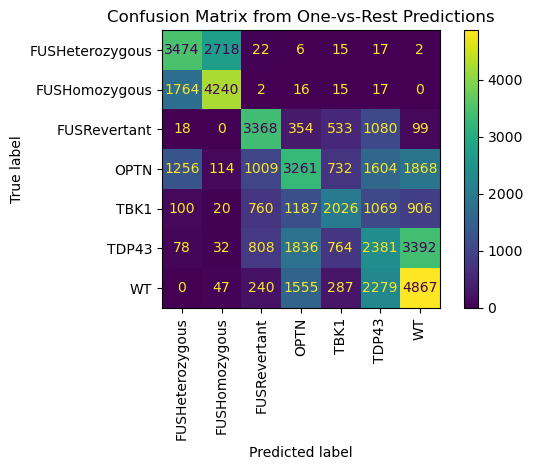

In [31]:
cm = confusion_matrix(results_df_bal["true_label"], results_df_bal["pred_label"], labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[l.replace('_Untreated', '') for l in class_names])
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix from One-vs-Rest Predictions")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.38      0.96      0.55      1561
           1       0.97      0.42      0.59      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.70      8218
   macro avg       0.78      0.80      0.71      8218
weighted avg       0.87      0.70      0.71      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.50      0.97      0.66        37
           1       0.53      1.00      0.69        18
           2       0.00      0.00      0.00        51

    accuracy                           0.51       106
   macro avg       0.34      0.66      0.45       106
weighted avg       0.26      0.51      0.35       106

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1510
           1       0.96      0.80      0.87      2184
           2       1.00      1.00      1.00      3129

    accuracy     

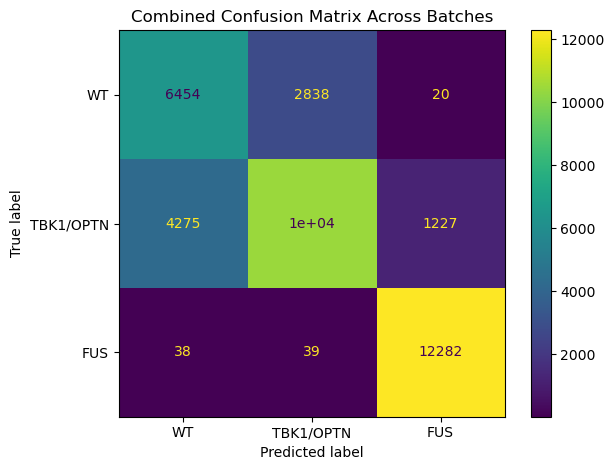

In [33]:
batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()


Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.11      0.21      0.15      1561
           1       0.56      0.39      0.46      4190
           2       1.00      0.99      1.00      2467

    accuracy                           0.54      8218
   macro avg       0.56      0.53      0.53      8218
weighted avg       0.61      0.54      0.56      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.41      0.39      0.40      1510
           1       0.58      0.61      0.60      2184
           2       1.00      0.99      1.00      3129

    accuracy                           0.74      6823
   macro avg       0.66      0.66      0.66      6823
weighted avg       0.74      0.74      0.74      6823

Train dataset
batches [1, 2, 3, 7, 8, 10]
(31145,) (31145, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
OPTN_Untreated: 8263
TBK1_Untreated: 5097
WT_Untreated: 7008
Test dataset
batches [9]
(6456,) (6456,

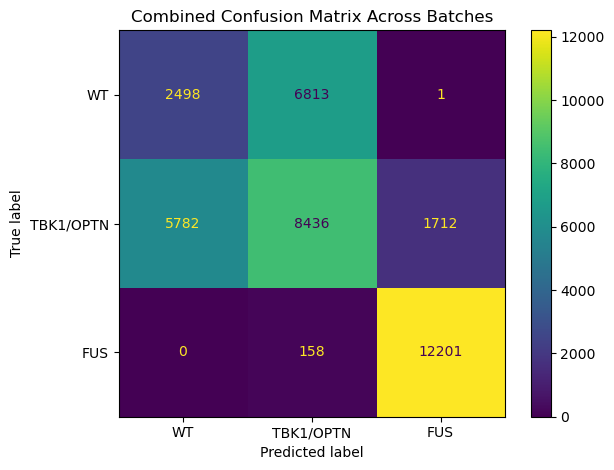

In [36]:
## Feature selection =>not as good

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    top_features = get_top_features(X_train, y_train_mapped, 100)
    X_train = X_train[:, top_features]
    X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.19      0.49      0.27      1561
           1       0.52      0.21      0.30      4190
           2       1.00      0.99      1.00      2467

    accuracy                           0.50      8218
   macro avg       0.57      0.56      0.52      8218
weighted avg       0.60      0.50      0.50      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.40      0.62      0.49      1510
           1       0.57      0.37      0.45      2184
           2       1.00      0.99      1.00      3129

    accuracy                           0.71      6823
   macro avg       0.66      0.66      0.64      6823
weighted avg       0.73      0.71      0.71      6823

Train dataset
batches [1, 2, 3, 7, 8, 10]
(31145,) (31145, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
OPTN_Untreated: 8263
TBK1_Untreated: 5097
WT_Untreated: 7008
Test dataset
batches [9]
(6456,) (6456,

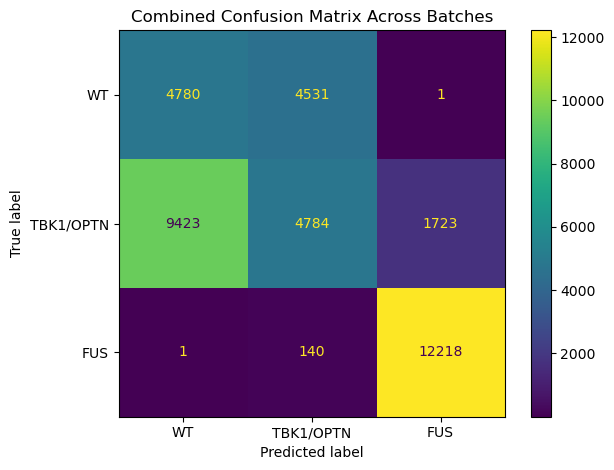

In [37]:
## Feature selection + bal =>not as good

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = True
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    top_features = get_top_features(X_train, y_train_mapped, 100)
    X_train = X_train[:, top_features]
    X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.19      0.49      0.27      1561
           1       0.53      0.22      0.31      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.50      8218
   macro avg       0.57      0.57      0.53      8218
weighted avg       0.61      0.50      0.51      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

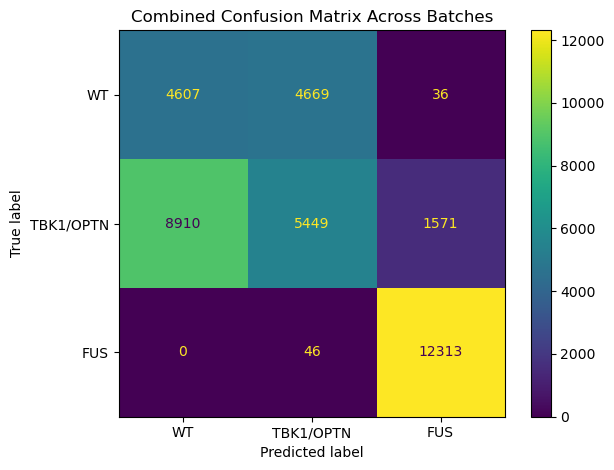

In [38]:
## Feature selection +bal+norm =>not as good

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = True
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = True
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    top_features = get_top_features(X_train, y_train_mapped, 100)
    X_train = X_train[:, top_features]
    X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.37      0.97      0.54      1561
           1       0.98      0.39      0.56      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.68      8218
   macro avg       0.78      0.79      0.70      8218
weighted avg       0.87      0.68      0.69      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        37
           1       0.55      1.00      0.71        18
           2       0.00      0.00      0.00        51

    accuracy                           0.52       106
   macro avg       0.35      0.67      0.46       106
weighted avg       0.27      0.52      0.35       106

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1510
           1       0.97      0.76      0.85      2184
           2       1.00      1.00      1.00      3129

    accuracy     

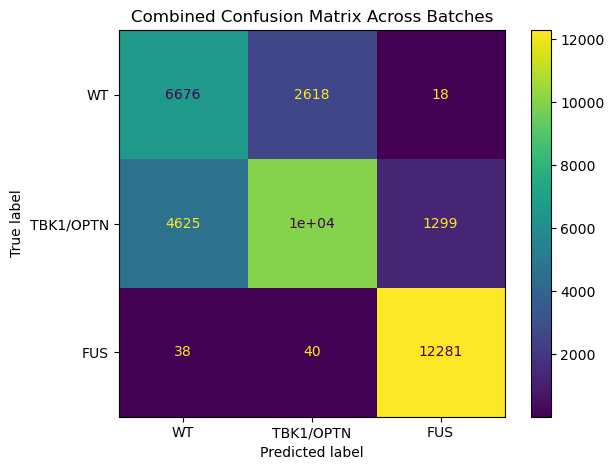

In [39]:
## No feature selection +bal =>same

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = True
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
#     top_features = get_top_features(X_train, y_train_mapped, 100)
#     X_train = X_train[:, top_features]
#     X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
[I] [16:58:04.002392] Unused keyword parameter: c during cuML estimator initialization
predict
              precision    recall  f1-score   support

           0       0.38      0.96      0.55      1561
           1       0.97      0.42      0.59      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.70      8218
   macro avg       0.78      0.80      0.71      8218
weighted avg       0.87      0.70      0.71      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreat

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.50      0.97      0.66        37
           1       0.53      1.00      0.69        18
           2       0.00      0.00      0.00        51

    accuracy                           0.51       106
   macro avg       0.34      0.66      0.45       106
weighted avg       0.26      0.51      0.35       106

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1510
           1       0.96      0.80      0.87      2184
           2       1.00      1.00      1.00      3129

    accuracy     

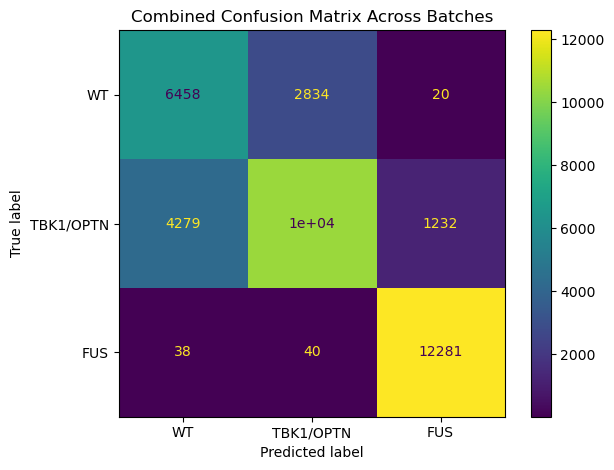

In [44]:
## add regularization c=0.1 - not improving

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1, c=0.1)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.38      0.96      0.55      1561
           1       0.97      0.42      0.59      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.70      8218
   macro avg       0.78      0.80      0.71      8218
weighted avg       0.87      0.70      0.70      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.50      0.97      0.66        37
           1       0.53      1.00      0.69        18
           2       0.00      0.00      0.00        51

    accuracy                           0.51       106
   macro avg       0.34      0.66      0.45       106
weighted avg       0.26      0.51      0.35       106

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1510
           1       0.96      0.80      0.87      2184
           2       1.00      1.00      1.00      3129

    accuracy     

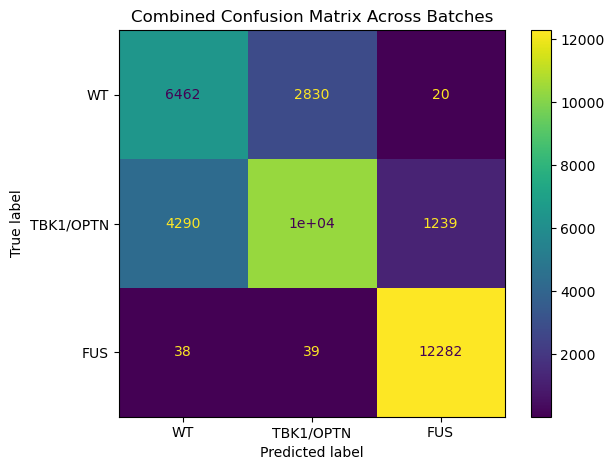

In [45]:
## add regularization c=10

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = cuMLLogisticRegression(verbose=1, c=10)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.44      0.32      0.37      1561
           1       0.77      0.85      0.81      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.79      8218
   macro avg       0.74      0.72      0.73      8218
weighted avg       0.78      0.79      0.78      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

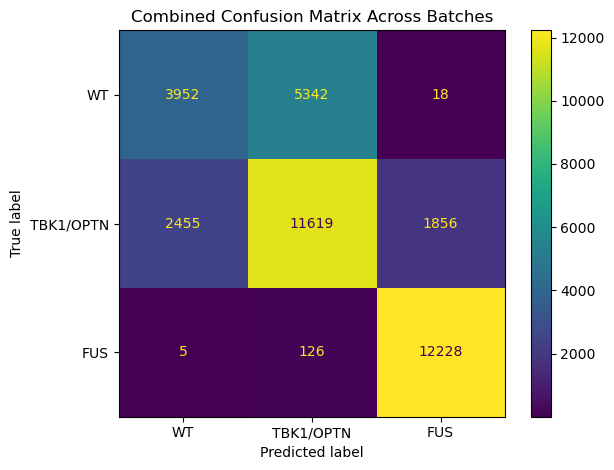

In [42]:
## RandomForestClassifier

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = True
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=100, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.46      0.21      0.28      1561
           1       0.75      0.91      0.82      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.80      8218
   macro avg       0.74      0.70      0.70      8218
weighted avg       0.77      0.80      0.77      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

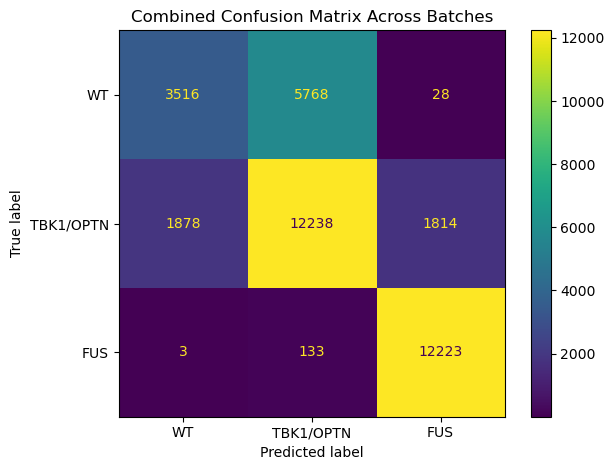

In [43]:
## RandomForestClassifier
batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    balance = False
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    norm = False
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=100, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.08      0.15      0.11      1561
           1       0.54      0.38      0.45      4190
           2       1.00      0.99      1.00      2467

    accuracy                           0.52      8218
   macro avg       0.54      0.51      0.52      8218
weighted avg       0.59      0.52      0.55      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Train dataset
batches [1, 2, 3, 7, 9, 10]
(30778,) (30778, 5568) [0 1 2]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
OPTN_Untreated: 8420
TBK1_Untreated: 5326
WT_Untreated: 7802
Test dataset
batches [8]
(6823,) (6823, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1567
FUSHomozygous_Untreated: 1562
OPTN_Untreated: 1429
TBK1_Untreated: 755
WT_Untreated: 1510
fit
predict
              precision    recall  f1-score   support

           0       0.37      0.36      0.36      1510
           1       0.56      0.57      0.56      2184
           2       1.00      0.99      1.00      3129

    accuracy                           0.72      6823
   macro avg       0.64      0.64      0.64      6823
weighted avg       0.72      0.72      0.72      6823

Train dataset
batches [1, 2, 3, 7, 8, 10]
(31145,) (31145, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
OPTN_Untreated: 8263
TBK1_Untreated: 5097
WT_Untreated: 7008
Test dataset
batches [9]
(6456,) (6456,

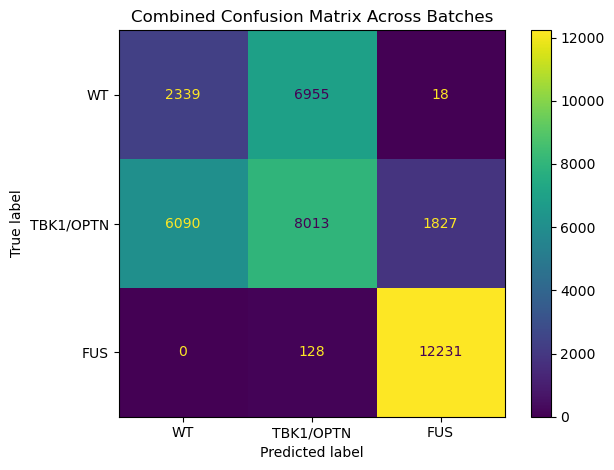

In [46]:
## RandomForestClassifier
balance = False
norm = False
choose_features=True

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=100, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.43      0.22      0.29      1561
           1       0.75      0.89      0.81      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.79      8218
   macro avg       0.73      0.70      0.70      8218
weighted avg       0.77      0.79      0.77      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

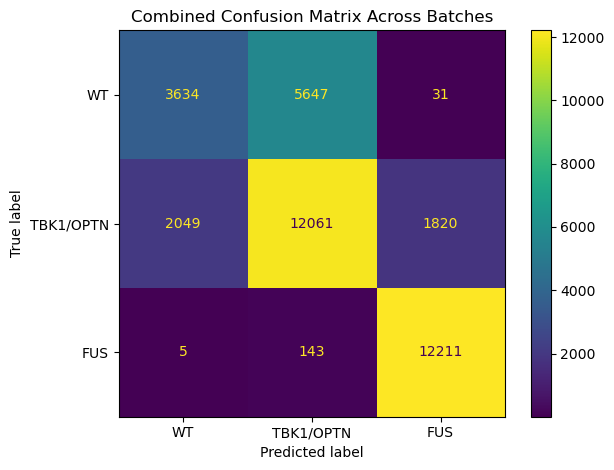

In [47]:
## RandomForestClassifier
balance = False
norm = False
choose_features=False

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=50, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.43      0.22      0.29      1561
           1       0.75      0.89      0.81      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.79      8218
   macro avg       0.73      0.70      0.70      8218
weighted avg       0.77      0.79      0.77      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

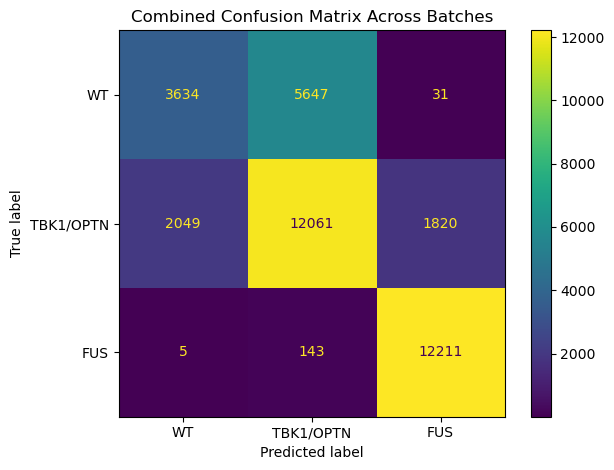

In [48]:
## RandomForestClassifier n_estimators=50
balance = False
norm = False
choose_features=False

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=50, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.46      0.19      0.27      1561
           1       0.75      0.92      0.83      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.80      8218
   macro avg       0.74      0.70      0.70      8218
weighted avg       0.77      0.80      0.77      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

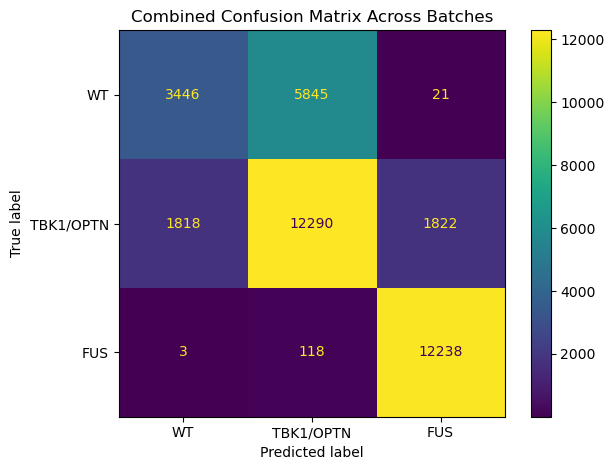

In [49]:
## RandomForestClassifier n_estimators=200
balance = False
norm = False
choose_features=False

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=200, max_depth=20)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.44      0.14      0.22      1561
           1       0.74      0.93      0.83      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.80      8218
   macro avg       0.73      0.69      0.68      8218
weighted avg       0.76      0.80      0.76      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

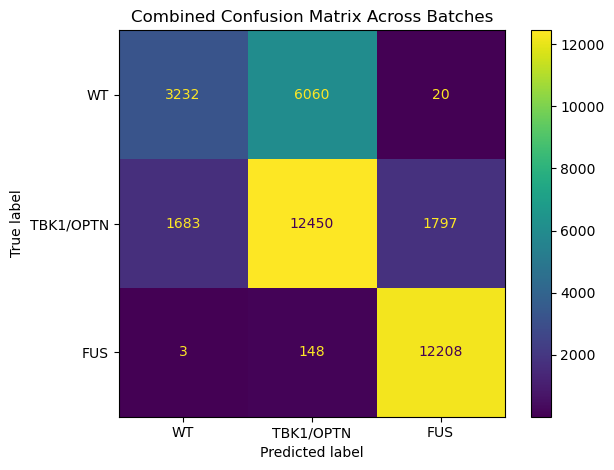

In [50]:
## RandomForestClassifier max_depth=10
balance = False
norm = False
choose_features=False

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=100, max_depth=10)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()

Train dataset
batches [2, 3, 7, 8, 9, 10]
(29383,) (29383, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
OPTN_Untreated: 7535
TBK1_Untreated: 4205
WT_Untreated: 7751
Test dataset
batches [1]
(8218,) (8218, 5568) [0 1 2]
FUSHeterozygous_Untreated: 1222
FUSHomozygous_Untreated: 1245
OPTN_Untreated: 2314
TBK1_Untreated: 1876
WT_Untreated: 1561
fit
predict
              precision    recall  f1-score   support

           0       0.46      0.22      0.30      1561
           1       0.76      0.90      0.82      4190
           2       1.00      1.00      1.00      2467

    accuracy                           0.80      8218
   macro avg       0.74      0.71      0.71      8218
weighted avg       0.77      0.80      0.78      8218

Train dataset
batches [1, 3, 7, 8, 9, 10]
(31553,) (31553, 5568) [0 1 2]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
OPTN_Untreated: 8200
TBK1_Untreated: 4861
WT_Untreated: 8526
Test dataset
batches [2]
(6048,) (6048

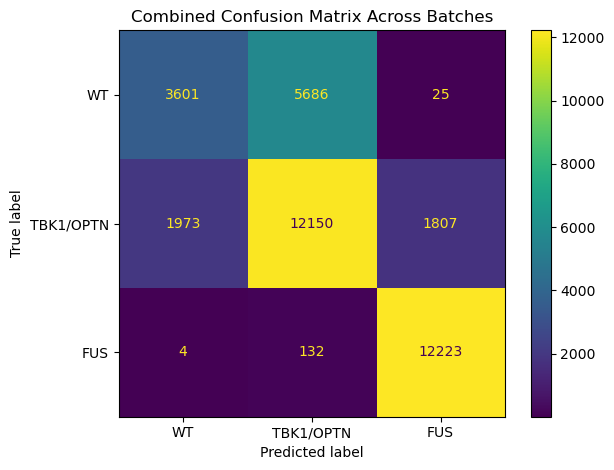

In [51]:
## RandomForestClassifier max_depth=50
balance = False
norm = False
choose_features=False

batches = [1,2,3,7,8,9,10]
accuracies = []
accumulated_cm = None

# Label mapping
label_map = {
    'WT_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}
excluded_labels = {'FUSRevertant_Untreated', 'TDP43_Untreated'}

for test_batch in batches:
    test_batches = [test_batch]
    train_batches = list(set(batches) - set(test_batches))

    X_train, y_train = load_batches(train_batches)
    X_test, y_test = load_batches(test_batches)

    # Filter out unwanted labels
    train_mask = ~np.isin(y_train, list(excluded_labels))
    test_mask = ~np.isin(y_test, list(excluded_labels))
    X_train, y_train = X_train[train_mask], y_train[train_mask]
    X_test, y_test = X_test[test_mask], y_test[test_mask]

    # Map labels to 0,1,2
    y_train_mapped = np.array([label_map[l] for l in y_train])
    y_test_mapped = np.array([label_map[l] for l in y_test])

    print('Train dataset')
    print('batches', train_batches)
    print(np.shape(y_train_mapped), np.shape(X_train), np.unique(y_train_mapped))
    count_labels(y_train)
    print('Test dataset')
    print('batches', test_batches)
    print(np.shape(y_test_mapped), np.shape(X_test), np.unique(y_test_mapped))
    count_labels(y_test)

    # Optional: balance
    if balance:
        ros = RandomOverSampler(random_state=42)
        X_train, y_train_mapped = ros.fit_resample(X_train, y_train_mapped)

    # Optional: normalize
    if norm:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    if choose_features:
        top_features = get_top_features(X_train, y_train_mapped, 100)
        X_train = X_train[:, top_features]
        X_test = X_test[:, top_features]

    # To GPU
    X_train = cudf.DataFrame.from_records(X_train)
    X_test = cudf.DataFrame.from_records(X_test)
    y_train_mapped = cudf.Series(y_train_mapped)

    # Train
    print('fit')
    clf = RandomForestClassifier(n_estimators=100, max_depth=50)
    clf.fit(X_train, y_train_mapped)

    # Predict
    print('predict')
    y_pred = clf.predict(X_test).to_numpy()
    report = classification_report(y_test_mapped, y_pred, output_dict=True)
    print(classification_report(y_test_mapped, y_pred))    
    accuracy = report['accuracy']
    accuracies.append(accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred, labels=[0, 1, 2])
    if accumulated_cm is None:
        accumulated_cm = cm
    else:
        accumulated_cm += cm

# Final summary
print(np.mean(accuracies), accuracies)
disp = ConfusionMatrixDisplay(confusion_matrix=accumulated_cm, display_labels=["WT", "TBK1/OPTN", "FUS"])
disp.plot(xticks_rotation=0)
plt.title("Combined Confusion Matrix Across Batches")
plt.tight_layout()
plt.show()


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1222
           1       0.87      0.53      0.66      1245
           2       0.81      0.91      0.86      1015
           3       0.79      0.51      0.62      2314
           4       0.12      0.00      0.00      1876
           5       0.28      0.31      0.29      1699
           6       0.28      0.71      0.40      1561

    accuracy                           0.50     10932
   macro avg       0.54      0.55      0.51     10932
weighted avg       0.52      0.50      0.47     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.06      0.80      0.12         5
           4       0.50      0.08      0.13        13
           5       0.07      0.23      0.11        13
           6       0.61      0.97      0.75        37

    accuracy                           0.27       163
   macro avg       0.18      0.30      0.16       163
weighted avg       0.19      0.27      0.19       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.81      0.19      0.31      1567
           1   

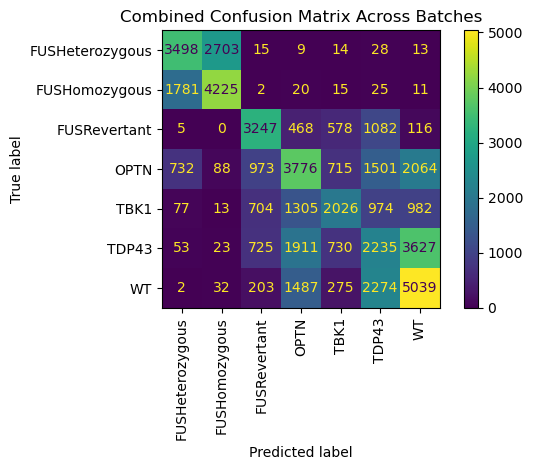

In [92]:
## Baseline
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.53      0.83      0.64      1222
           1       0.62      0.27      0.37      1245
           2       0.83      0.18      0.30      1015
           3       0.37      0.72      0.49      2314
           4       0.07      0.00      0.00      1876
           5       0.29      0.35      0.32      1699
           6       0.11      0.12      0.11      1561

    accuracy                           0.37     10932
   macro avg       0.40      0.35      0.32     10932
weighted avg       0.36      0.37      0.31     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.15      0.23      0.18        26
           1       0.31      0.16      0.21        25
           2       0.00      0.00      0.00        44
           3       0.04      0.80      0.08         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.67      0.16      0.26        37

    accuracy                           0.12       163
   macro avg       0.17      0.19      0.10       163
weighted avg       0.22      0.12      0.12       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.91      0.07      0.14      1567
           1   

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.15      0.20      0.17       963
           1       0.21      0.86      0.34       619
           2       0.00      0.00      0.00      1298
           3       0.00      0.00      0.00      1586
           4       0.02      0.00      0.00       984
           5       0.04      0.04      0.04      1439
           6       0.69      0.13      0.22      2304

    accuracy                           0.12      9193
   macro avg       0.16      0.18      0.11      9193
weighted avg       0.21      0.12      0.10      9193


=== Batch 10 ===
Train: (45125, 5568) Labels: [0 1 2 3 4 5 6]
Test: (7276, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116
              precision    recall  f1-score   support

           0       0.23      0.11      0.15       267
           1  

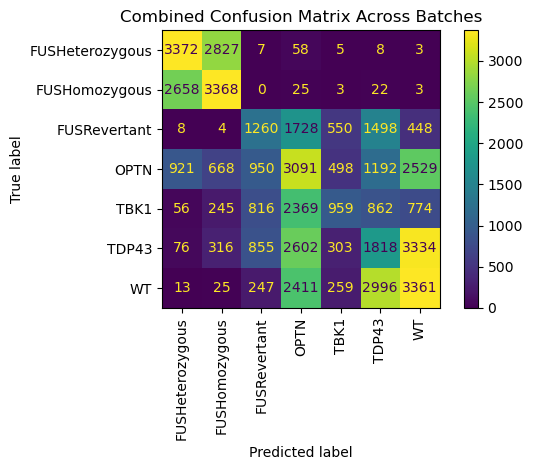

In [74]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 100, "max_depth": 20},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.53      0.83      0.64      1222
           1       0.62      0.27      0.37      1245
           2       0.83      0.18      0.30      1015
           3       0.37      0.72      0.49      2314
           4       0.07      0.00      0.00      1876
           5       0.29      0.35      0.32      1699
           6       0.11      0.12      0.11      1561

    accuracy                           0.37     10932
   macro avg       0.40      0.35      0.32     10932
weighted avg       0.36      0.37      0.31     10932


=== Overall Accuracy ===
0.36525795828759605 [0.36525795828759605]


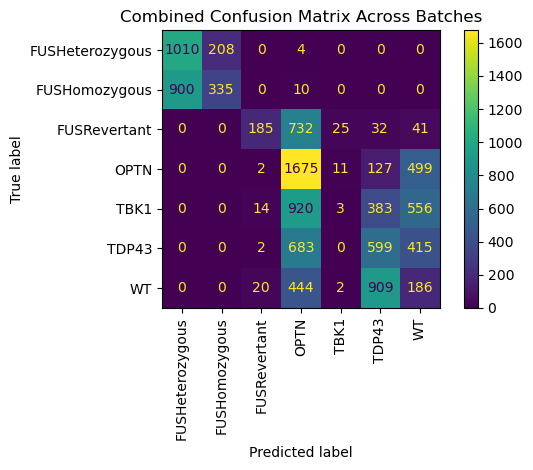

In [75]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 100, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.52      0.76      0.62      1222
           1       0.57      0.30      0.40      1245
           2       0.68      0.20      0.31      1015
           3       0.38      0.70      0.49      2314
           4       0.08      0.00      0.01      1876
           5       0.28      0.33      0.30      1699
           6       0.14      0.16      0.15      1561

    accuracy                           0.36     10932
   macro avg       0.38      0.35      0.32     10932
weighted avg       0.34      0.36      0.32     10932


=== Overall Accuracy ===
0.35949506037321627 [0.35949506037321627]


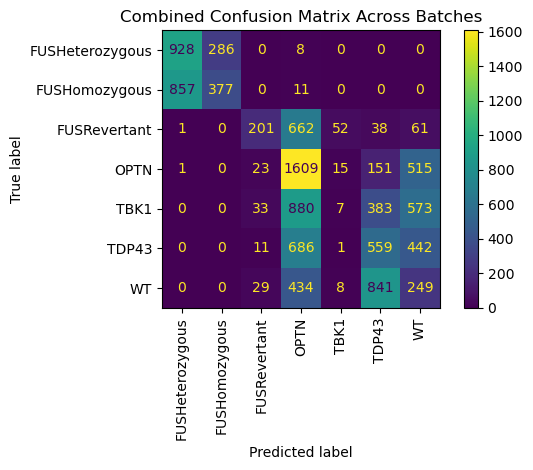

In [76]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 50, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      1222
           1       0.66      0.26      0.38      1245
           2       0.90      0.19      0.32      1015
           3       0.38      0.75      0.51      2314
           4       0.10      0.00      0.00      1876
           5       0.30      0.37      0.33      1699
           6       0.09      0.10      0.10      1561

    accuracy                           0.37     10932
   macro avg       0.42      0.36      0.33     10932
weighted avg       0.38      0.37      0.32     10932


=== Overall Accuracy ===
0.3739480424442005 [0.3739480424442005]


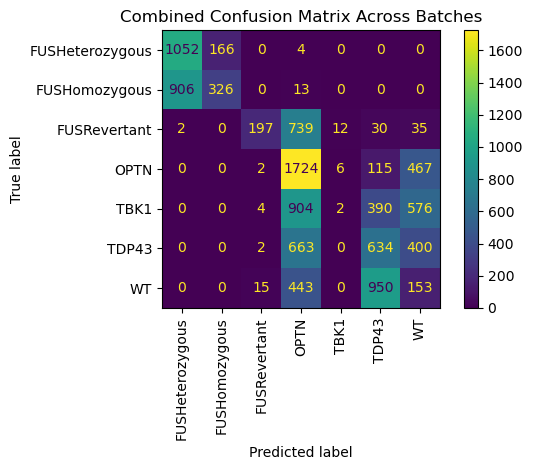

In [77]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 200, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.53      0.79      0.63      1222
           1       0.60      0.30      0.40      1245
           2       0.58      0.32      0.42      1015
           3       0.37      0.67      0.48      2314
           4       0.16      0.01      0.03      1876
           5       0.30      0.33      0.31      1699
           6       0.13      0.13      0.13      1561

    accuracy                           0.37     10932
   macro avg       0.38      0.37      0.34     10932
weighted avg       0.35      0.37      0.33     10932


=== Overall Accuracy ===
0.36717892425905596 [0.36717892425905596]


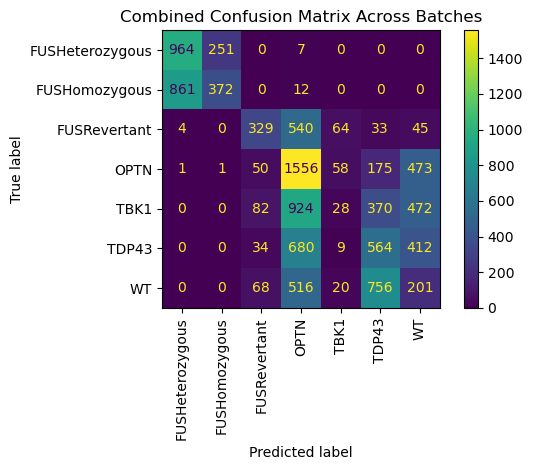

In [78]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=True,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 50, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.51      0.71      0.60      1222
           1       0.55      0.33      0.41      1245
           2       0.49      0.20      0.28      1015
           3       0.36      0.66      0.47      2314
           4       0.11      0.01      0.01      1876
           5       0.27      0.29      0.28      1699
           6       0.15      0.18      0.16      1561

    accuracy                           0.35     10932
   macro avg       0.35      0.34      0.32     10932
weighted avg       0.33      0.35      0.31     10932


=== Overall Accuracy ===
0.34824368825466523 [0.34824368825466523]


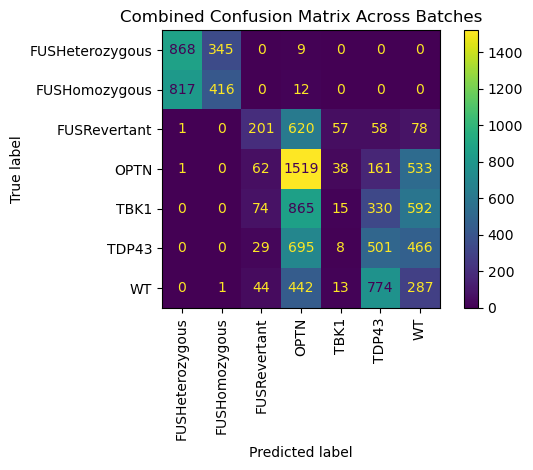

In [79]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 30, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.51      0.70      0.59      1222
           1       0.54      0.35      0.42      1245
           2       0.43      0.22      0.29      1015
           3       0.36      0.60      0.45      2314
           4       0.15      0.02      0.03      1876
           5       0.27      0.29      0.28      1699
           6       0.16      0.22      0.19      1561

    accuracy                           0.34     10932
   macro avg       0.35      0.34      0.32     10932
weighted avg       0.33      0.34      0.31     10932


=== Overall Accuracy ===
0.34357848518111966 [0.34357848518111966]


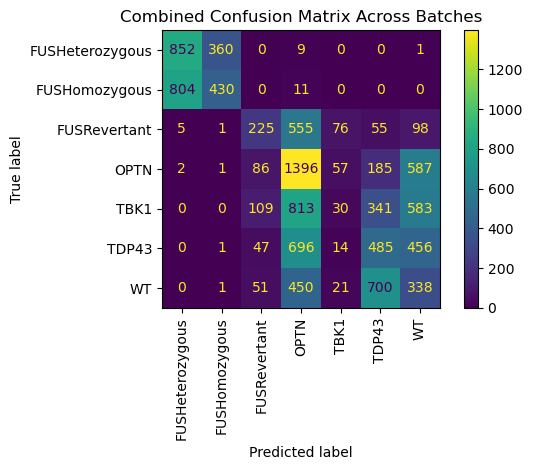

In [80]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 20, "max_depth": 20},
    test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.52      0.70      0.59      1222
           1       0.55      0.35      0.43      1245
           2       0.50      0.19      0.28      1015
           3       0.35      0.61      0.45      2314
           4       0.13      0.01      0.02      1876
           5       0.28      0.30      0.29      1699
           6       0.14      0.19      0.16      1561

    accuracy                           0.34     10932
   macro avg       0.35      0.34      0.32     10932
weighted avg       0.33      0.34      0.31     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.12      0.23      0.16        26
           1       0.15      0.24      0.18        25
           2       0.00      0.00      0.00        44
           3       0.03      0.40      0.06         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.50      0.11      0.18        37

    accuracy                           0.11       163
   macro avg       0.12      0.14      0.08       163
weighted avg       0.16      0.11      0.10       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.70      0.11      0.19      1567
           1   

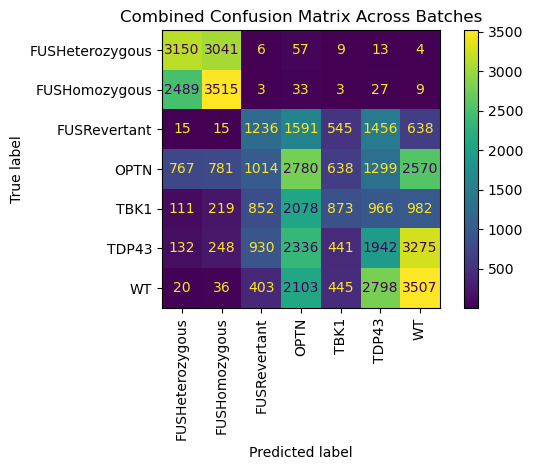

In [91]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuRandomForestClassifier,
    classifier_kwargs={"n_estimators": 20, "max_depth": 15},
#     test_specific_batch=[1]
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1222
           1       0.83      0.50      0.63      1245
           2       0.83      0.91      0.86      1015
           3       0.78      0.54      0.64      2314
           4       0.03      0.00      0.00      1876
           5       0.26      0.35      0.30      1699
           6       0.31      0.69      0.43      1561

    accuracy                           0.51     10932
   macro avg       0.52      0.55      0.52     10932
weighted avg       0.50      0.51      0.48     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      0.60      0.10         5
           4       0.50      0.15      0.24        13
           5       0.05      0.23      0.08        13
           6       0.72      0.78      0.75        37

    accuracy                           0.23       163
   macro avg       0.19      0.25      0.17       163
weighted avg       0.21      0.23      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.77      0.24      0.36      1567
           1   

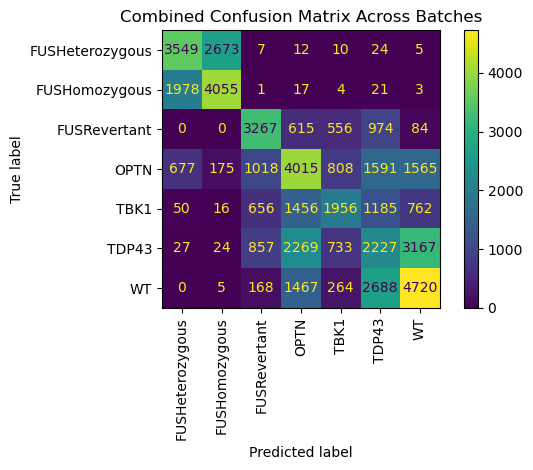


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.895746     0.565127     0.940765 0.565037 0.940785
  FUSHomozygous_Untreated  0.906166     0.667051     0.937546 0.583621 0.955470
   FUSRevertant_Untreated  0.905803     0.594432     0.942288 0.546870 0.951989
           OPTN_Untreated  0.777294     0.407656     0.862850 0.407573 0.862891
           TBK1_Untreated  0.875957     0.321658     0.948726 0.451628 0.914188
          TDP43_Untreated  0.741226     0.239359     0.849572 0.255683 0.838022
             WT_Untreated  0.805767     0.506873     0.870361 0.457986 0.890913
            Macro Average  0.843994     0.471737     0.907444 0.466914 0.907751


In [19]:
from cuml.svm import SVC as cuSVC
run_baseline_model(
    classifier_class=cuSVC,
    classifier_kwargs={"kernel": "linear", "C": 1.0, "gamma": "scale"},
    norm=True,  # important for SVMs
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1222
           1       0.83      0.50      0.63      1245
           2       0.83      0.91      0.86      1015
           3       0.78      0.54      0.64      2314
           4       0.03      0.00      0.00      1876
           5       0.26      0.35      0.30      1699
           6       0.31      0.69      0.43      1561

    accuracy                           0.51     10932
   macro avg       0.52      0.55      0.52     10932
weighted avg       0.50      0.51      0.48     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      0.60      0.10         5
           4       0.50      0.15      0.24        13
           5       0.05      0.23      0.08        13
           6       0.72      0.78      0.75        37

    accuracy                           0.23       163
   macro avg       0.19      0.25      0.17       163
weighted avg       0.21      0.23      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.77      0.24      0.36      1567
           1   

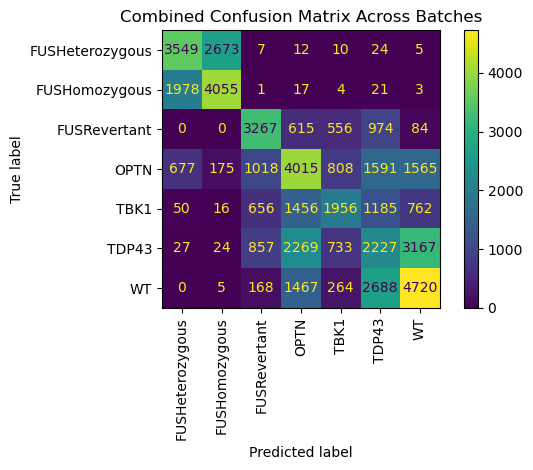


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.895746     0.565127     0.940765 0.565037 0.940785
  FUSHomozygous_Untreated  0.906166     0.667051     0.937546 0.583621 0.955470
   FUSRevertant_Untreated  0.905803     0.594432     0.942288 0.546870 0.951989
           OPTN_Untreated  0.777294     0.407656     0.862850 0.407573 0.862891
           TBK1_Untreated  0.875957     0.321658     0.948726 0.451628 0.914188
          TDP43_Untreated  0.741226     0.239359     0.849572 0.255683 0.838022
             WT_Untreated  0.805767     0.506873     0.870361 0.457986 0.890913
            Macro Average  0.843994     0.471737     0.907444 0.466914 0.907751


In [22]:
from cuml.svm import SVC as cuSVC
run_baseline_model(
    classifier_class=cuSVC,
    classifier_kwargs={"kernel": "linear", "C": 1.0},
    norm=True,  # important for SVMs
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1222
           1       0.83      0.52      0.64      1245
           2       0.89      0.85      0.87      1015
           3       0.71      0.63      0.67      2314
           4       0.00      0.00      0.00      1876
           5       0.30      0.55      0.39      1699
           6       0.40      0.58      0.47      1561

    accuracy                           0.54     10932
   macro avg       0.54      0.58      0.54     10932
weighted avg       0.50      0.54      0.51     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      1.00      0.10         5
           4       0.00      0.00      0.00        13
           5       0.03      0.08      0.04        13
           6       0.84      0.84      0.84        37

    accuracy                           0.23       163
   macro avg       0.13      0.27      0.14       163
weighted avg       0.19      0.23      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.87      0.15      0.26      1567
           1   

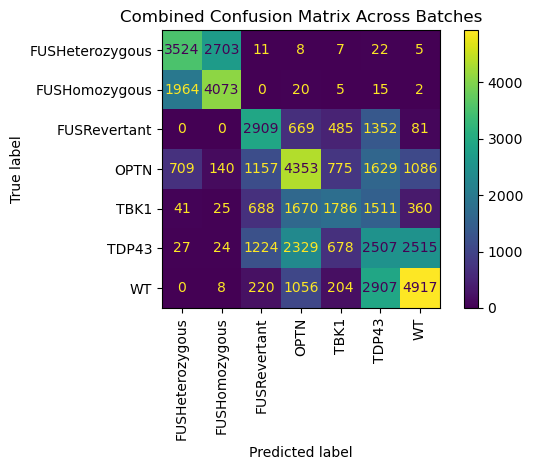


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.895097     0.561146     0.940569 0.562490 0.940264
  FUSHomozygous_Untreated  0.906376     0.670012     0.937395 0.584110 0.955842
   FUSRevertant_Untreated  0.887655     0.529294     0.929645 0.468513 0.943995
           OPTN_Untreated  0.785348     0.441974     0.864824 0.430777 0.870059
           TBK1_Untreated  0.876930     0.293702     0.953497 0.453299 0.911372
          TDP43_Untreated  0.728383     0.269454     0.827459 0.252137 0.839912
             WT_Untreated  0.838858     0.528028     0.906032 0.548405 0.898814
            Macro Average  0.845521     0.470516     0.908489 0.471390 0.908608


In [20]:
from cuml.svm import SVC as cuSVC
run_baseline_model(
    classifier_class=cuSVC,
    classifier_kwargs={"kernel": "rbf", "C": 1.0, "gamma": "scale"},
    norm=True
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.39      0.47      0.43      1222
           1       0.50      0.75      0.60      1245
           2       0.76      0.25      0.37      1015
           3       0.42      0.43      0.43      2314
           4       0.17      0.05      0.07      1876
           5       0.27      0.66      0.38      1699
           6       0.52      0.06      0.11      1561

    accuracy                           0.37     10932
   macro avg       0.43      0.38      0.34     10932
weighted avg       0.40      0.37      0.33     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.69      0.35      0.46        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.04      1.00      0.08         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.81      0.70      0.75        37

    accuracy                           0.25       163
   macro avg       0.22      0.29      0.19       163
weighted avg       0.30      0.25      0.25       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.61      0.38      0.47      1567
           1   

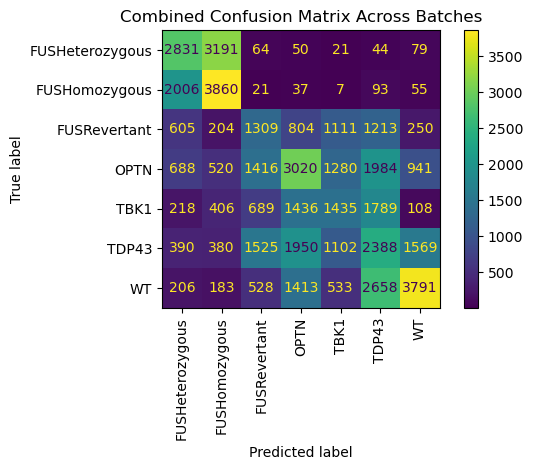


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.855690     0.450796     0.910822 0.407690 0.924126
  FUSHomozygous_Untreated  0.864449     0.634973     0.894564 0.441446 0.949172
   FUSRevertant_Untreated  0.839125     0.238173     0.909541 0.235771 0.910628
           OPTN_Untreated  0.761092     0.306630     0.866281 0.346728 0.843698
           TBK1_Untreated  0.833973     0.235981     0.912478 0.261432 0.900964
          TDP43_Untreated  0.719528     0.256664     0.819454 0.234831 0.836238
             WT_Untreated  0.837350     0.407109     0.930330 0.558074 0.878947
            Macro Average  0.815887     0.361475     0.891924 0.355139 0.891967


In [23]:
from cuml.neighbors import KNeighborsClassifier as cuKNNClassifier
run_baseline_model(
    classifier_class=cuKNNClassifier,
    classifier_kwargs={"n_neighbors": 5},
    norm=True
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.47      0.39      0.43      1222
           1       0.57      0.90      0.70      1245
           2       0.96      0.17      0.30      1015
           3       0.52      0.45      0.48      2314
           4       0.05      0.01      0.02      1876
           5       0.27      0.83      0.41      1699
           6       0.61      0.02      0.04      1561

    accuracy                           0.39     10932
   macro avg       0.49      0.40      0.34     10932
weighted avg       0.46      0.39      0.33     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.70      0.27      0.39        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      1.00      0.09         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.78      0.84      0.81        37

    accuracy                           0.26       163
   macro avg       0.22      0.30      0.18       163
weighted avg       0.29      0.26      0.25       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.74      0.23      0.35      1567
           1   

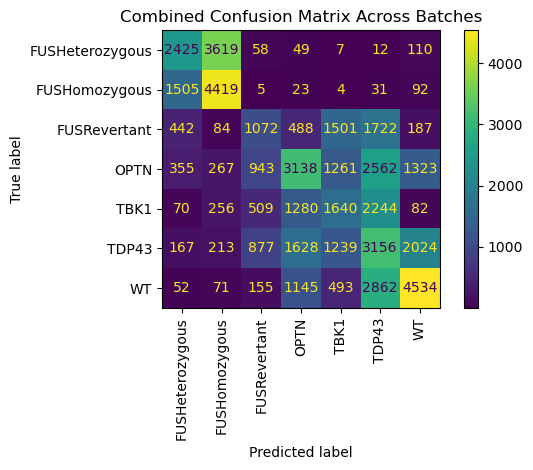


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.876987     0.386146     0.943822 0.483453 0.918645
  FUSHomozygous_Untreated  0.882254     0.726929     0.902638 0.494904 0.961815
   FUSRevertant_Untreated  0.866968     0.195051     0.945699 0.296214 0.909311
           OPTN_Untreated  0.783897     0.318611     0.891591 0.404851 0.849698
           TBK1_Untreated  0.829278     0.269692     0.902742 0.266884 0.903991
          TDP43_Untreated  0.702658     0.339209     0.781122 0.250695 0.845574
             WT_Untreated  0.835957     0.486899     0.911393 0.542864 0.891530
            Macro Average  0.825429     0.388934     0.897001 0.391409 0.897223


In [16]:
from cuml.neighbors import KNeighborsClassifier as cuKNNClassifier
run_baseline_model(
    classifier_class=cuKNNClassifier,
    classifier_kwargs={"n_neighbors": 50},
    norm=True
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:43:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:44:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.58      0.87      0.70      1222
           1       0.76      0.38      0.51      1245
           2       0.82      0.62      0.71      1015
           3       0.55      0.64      0.59      2314
           4       0.06      0.00      0.01      1876
           5       0.31      0.39      0.35      1699
           6       0.26      0.46      0.33      1561

    accuracy                           0.46     10932
   macro avg       0.48      0.48      0.46     10932
weighted avg       0.44      0.46      0.43     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
FUSRevertant_Untreated: 4696
OPTN_Untreated: 8200
TBK1_Untreated: 4861
TDP43_Untreated: 7796
WT_Untreated: 8526


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:45:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:46:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.57      0.73      0.64      1231
           1       0.60      0.41      0.49      1162
           2       0.36      0.98      0.53       800
           3       0.49      0.58      0.53      1649
           4       0.60      0.32      0.42      1220
           5       0.30      0.09      0.14      1508
           6       0.57      0.55      0.56       786

    accuracy                           0.49      8356
   macro avg       0.50      0.52      0.47      8356
weighted avg       0.49      0.49      0.46      8356


=== Batch 3 ===
Train: (45470, 5568) Labels: [0 1 2 3 4 5 6]
Test: (6931, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5276
FUSHomozygous_Untreated: 5279
FUSRevertant_Untreated: 4365
OPTN_Untreated: 8746
TBK1_Untreated: 5036
TDP43_Untreated: 8374
WT_Untreated: 8394


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:46:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:46:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:47:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1004
           1       0.83      0.29      0.43       800
           2       0.72      0.34      0.46      1131
           3       0.33      0.32      0.32      1103
           4       0.39      0.87      0.53      1045
           5       0.39      0.28      0.33       930
           6       0.37      0.20      0.26       918

    accuracy                           0.47      6931
   macro avg       0.52      0.46      0.44      6931
weighted avg       0.51      0.47      0.44      6931


=== Batch 7 ===
Train: (52238, 5568) Labels: [0 1 2 3 4 5 6]
Test: (163, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6254
FUSHomozygous_Untreated: 6054
FUSRevertant_Untreated: 5452
OPTN_Untreated: 9844
TBK1_Untreated: 6068
TDP43_Untreated: 9291
WT_Untreated: 9275


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:47:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:47:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:48:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.30      0.12      0.17        26
           1       0.67      0.08      0.14        25
           2       0.00      0.00      0.00        44
           3       0.04      0.40      0.08         5
           4       0.25      0.15      0.19        13
           5       0.11      0.46      0.18        13
           6       0.72      0.78      0.75        37

    accuracy                           0.27       163
   macro avg       0.30      0.28      0.22       163
weighted avg       0.34      0.27      0.25       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:49:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:49:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:50:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.81      0.10      0.18      1567
           1       0.52      0.97      0.68      1562
           2       0.38      0.16      0.23      1163
           3       0.33      0.26      0.29      1429
           4       0.59      0.09      0.15       755
           5       0.25      0.61      0.36      1564
           6       0.30      0.19      0.24      1510

    accuracy                           0.37      9550
   macro avg       0.46      0.34      0.30      9550
weighted avg       0.45      0.37      0.32      9550


=== Batch 9 ===
Train: (43208, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9193, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
FUSRevertant_Untreated: 4198
OPTN_Untreated: 8263
TBK1_Untreated: 5097
TDP43_Untreated: 7865
WT_Untreated: 7008


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:50:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:51:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.12      0.19      0.14       963
           1       0.24      0.76      0.36       619
           2       0.93      0.03      0.06      1298
           3       0.05      0.09      0.06      1586
           4       0.12      0.04      0.06       984
           5       0.03      0.04      0.03      1439
           6       0.90      0.20      0.32      2304

    accuracy                           0.15      9193
   macro avg       0.34      0.19      0.15      9193
weighted avg       0.41      0.15      0.15      9193


=== Batch 10 ===
Train: (45125, 5568) Labels: [0 1 2 3 4 5 6]
Test: (7276, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:52:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:53:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn

              precision    recall  f1-score   support

           0       0.25      0.07      0.11       267
           1       0.71      0.92      0.80       666
           2       0.03      0.80      0.06        45
           3       0.96      0.01      0.03      1763
           4       0.25      0.24      0.25       188
           5       0.05      0.01      0.01      2151
           6       0.44      0.95      0.60      2196

    accuracy                           0.39      7276
   macro avg       0.38      0.43      0.26      7276
weighted avg       0.46      0.39      0.27      7276


=== Overall Accuracy ===
0.3713374682263305 [0.46084888401024515, 0.48851124940162755, 0.47150483335737986, 0.26993865030674846, 0.37026178010471206, 0.1498966605025563, 0.3884002199010445]


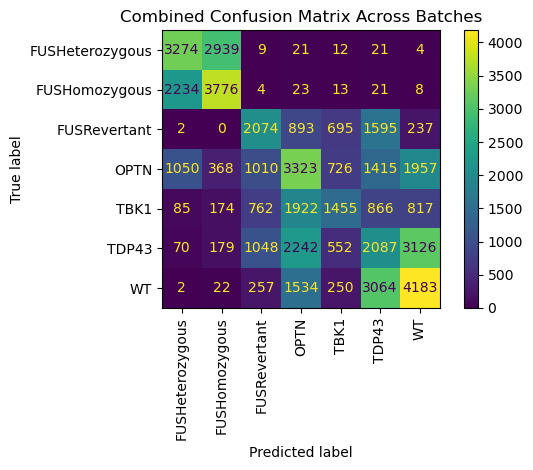


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.876930     0.521338     0.925349 0.487420 0.934200
  FUSHomozygous_Untreated  0.885785     0.621155     0.920513 0.506302 0.948757
   FUSRevertant_Untreated  0.875728     0.377365     0.934122 0.401627 0.927557
           OPTN_Untreated  0.748841     0.337395     0.844073 0.333702 0.846241
           TBK1_Untreated  0.868819     0.239270     0.951468 0.392925 0.905006
          TDP43_Untreated  0.729032     0.224312     0.837993 0.230125 0.833449
             WT_Untreated  0.784775     0.449205     0.857295 0.404859 0.878081
            Macro Average  0.824273     0.395720     0.895831 0.393851 0.896184


In [9]:
from xgboost import XGBClassifier
run_baseline_model(
    classifier_class=XGBClassifier,
    classifier_kwargs={
        "tree_method": "gpu_hist",
        "predictor": "gpu_predictor",
        "n_estimators": 100,
        "max_depth": 6,
        "use_label_encoder": False,
        "eval_metric": "mlogloss"
    },
    norm=False
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.50      0.90      0.64      1222
           1       0.72      0.32      0.44      1245
           2       0.86      0.88      0.87      1015
           3       0.72      0.63      0.67      2314
           4       0.09      0.00      0.00      1876
           5       0.31      0.38      0.34      1699
           6       0.38      0.73      0.50      1561

    accuracy                           0.52     10932
   macro avg       0.51      0.55      0.50     10932
weighted avg       0.49      0.52      0.47     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      0.60      0.09         5
           4       1.00      0.08      0.14        13
           5       0.05      0.23      0.09        13
           6       0.69      0.78      0.73        37

    accuracy                           0.22       163
   macro avg       0.26      0.24      0.15       163
weighted avg       0.24      0.22      0.19       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.84      0.26      0.40      1567
           1   

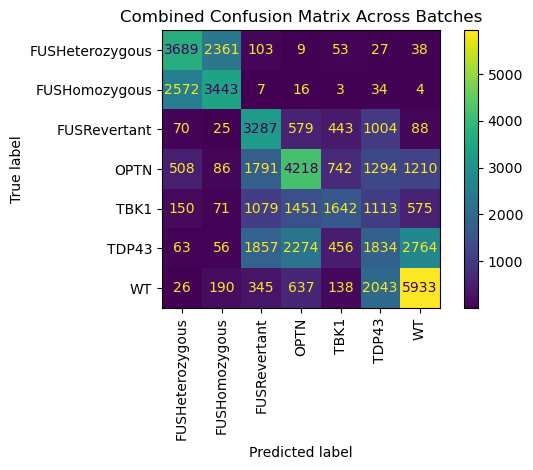


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.885880     0.587420     0.926519 0.521192 0.942833
  FUSHomozygous_Untreated  0.896471     0.566376     0.939791 0.552471 0.942905
   FUSRevertant_Untreated  0.858953     0.598071     0.889521 0.388121 0.949718
           OPTN_Untreated  0.797771     0.428267     0.883296 0.459277 0.869704
           TBK1_Untreated  0.880269     0.270021     0.960384 0.472246 0.909267
          TDP43_Untreated  0.752199     0.197120     0.872033 0.249558 0.834192
             WT_Untreated  0.846224     0.637135     0.891411 0.559084 0.919141
            Macro Average  0.845396     0.469201     0.908994 0.457421 0.909680


In [15]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (100,),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    norm=True
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.53      0.90      0.67      1222
           1       0.71      0.20      0.31      1245
           2       0.82      0.86      0.84      1015
           3       0.77      0.68      0.72      2314
           4       0.07      0.00      0.00      1876
           5       0.30      0.63      0.40      1699
           6       0.40      0.46      0.43      1561

    accuracy                           0.51     10932
   macro avg       0.51      0.53      0.48     10932
weighted avg       0.50      0.51      0.47     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.07      0.80      0.12         5
           4       0.75      0.23      0.35        13
           5       0.06      0.15      0.09        13
           6       0.54      0.95      0.69        37

    accuracy                           0.28       163
   macro avg       0.27      0.31      0.19       163
weighted avg       0.27      0.28      0.21       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.89      0.12      0.22      1567
           1   

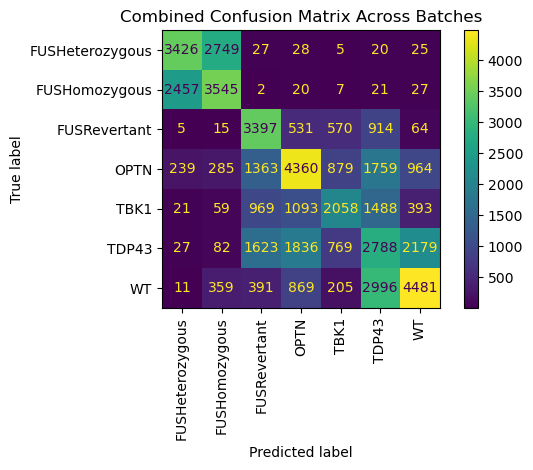


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.892865     0.545541     0.940157 0.553831 0.938245
  FUSHomozygous_Untreated  0.883914     0.583155     0.923384 0.499718 0.944070
   FUSRevertant_Untreated  0.876453     0.618086     0.906726 0.437082 0.952968
           OPTN_Untreated  0.811721     0.442685     0.897138 0.499027 0.874290
           TBK1_Untreated  0.876758     0.338431     0.947431 0.458046 0.916027
          TDP43_Untreated  0.738287     0.299656     0.832981 0.279191 0.846375
             WT_Untreated  0.838114     0.481207     0.915245 0.550965 0.890869
            Macro Average  0.845445     0.472680     0.909009 0.468266 0.908978


In [17]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (100,),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    norm=False
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.50      0.79      0.62      1222
           1       0.56      0.23      0.33      1245
           2       0.82      0.89      0.85      1015
           3       0.78      0.61      0.69      2314
           4       0.07      0.00      0.00      1876
           5       0.27      0.42      0.33      1699
           6       0.32      0.59      0.41      1561

    accuracy                           0.48     10932
   macro avg       0.47      0.51      0.46     10932
weighted avg       0.46      0.48      0.44     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.06      0.60      0.10         5
           4       0.75      0.23      0.35        13
           5       0.08      0.31      0.13        13
           6       0.65      0.95      0.77        37

    accuracy                           0.29       163
   macro avg       0.36      0.31      0.22       163
weighted avg       0.37      0.29      0.25       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.86      0.15      0.25      1567
           1   

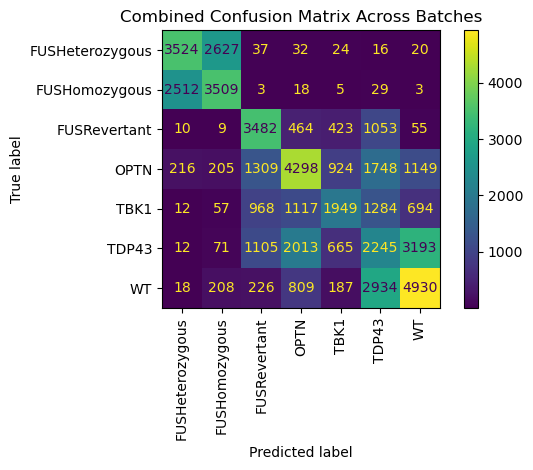


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.894353     0.561146     0.939724 0.559010 0.940213
  FUSHomozygous_Untreated  0.890327     0.577233     0.931415 0.524828 0.943782
   FUSRevertant_Untreated  0.891949     0.633552     0.922226 0.488359 0.955512
           OPTN_Untreated  0.809088     0.436389     0.895352 0.491144 0.872829
           TBK1_Untreated  0.878628     0.320506     0.951900 0.466603 0.914317
          TDP43_Untreated  0.730482     0.241294     0.836091 0.241164 0.836188
             WT_Untreated  0.818782     0.529424     0.881315 0.490840 0.896546
            Macro Average  0.844801     0.471364     0.908289 0.465993 0.908484


In [30]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (200,),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    norm=False
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.53      0.44      1222
           1       0.24      0.14      0.18      1245
           2       0.59      0.68      0.63      1015
           3       0.47      0.52      0.50      2314
           4       0.03      0.00      0.00      1876
           5       0.31      0.59      0.41      1699
           6       0.37      0.33      0.35      1561

    accuracy                           0.39     10932
   macro avg       0.34      0.40      0.36     10932
weighted avg       0.33      0.39      0.35     10932

here!
here2!
here3!

=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
FUSRevertant_Untreated: 4696
OPTN_Untreated: 8200
TBK1_Untreated: 4861
TDP43_Untreated: 7796
WT_Untreated: 8526


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.59      0.79      0.67      1231
           1       0.69      0.40      0.50      1162
           2       0.23      0.98      0.38       800
           3       0.53      0.47      0.50      1649
           4       0.58      0.18      0.27      1220
           5       0.13      0.02      0.03      1508
           6       0.56      0.45      0.50       786

    accuracy                           0.43      8356
   macro avg       0.47      0.47      0.41      8356
weighted avg       0.47      0.43      0.40      8356

here!
here2!
here3!

=== Batch 3 ===
Train: (45470, 5568) Labels: [0 1 2 3 4 5 6]
Test: (6931, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5276
FUSHomozygous_Untreated: 5279
FUSRevertant_Untreated: 4365
OPTN_Untreated: 8746
TBK1_Untreated: 5036
TDP43_Untreated: 8374
WT_Untreated: 8394


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1004
           1       0.66      0.40      0.50       800
           2       0.74      0.53      0.62      1131
           3       0.27      0.21      0.24      1103
           4       0.37      0.84      0.52      1045
           5       0.40      0.11      0.18       930
           6       0.44      0.38      0.41       918

    accuracy                           0.48      6931
   macro avg       0.50      0.47      0.45      6931
weighted avg       0.50      0.48      0.46      6931

here!
here2!
here3!

=== Batch 7 ===
Train: (52238, 5568) Labels: [0 1 2 3 4 5 6]
Test: (163, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6254
FUSHomozygous_Untreated: 6054
FUSRevertant_Untreated: 5452
OPTN_Untreated: 9844
TBK1_Untreated: 6068
TDP43_Untreated: 9291
WT_Untreated: 9275


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornstein

              precision    recall  f1-score   support

           0       0.56      0.35      0.43        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.06      1.00      0.11         5
           4       0.00      0.00      0.00        13
           5       0.03      0.08      0.04        13
           6       0.96      0.59      0.73        37

    accuracy                           0.23       163
   macro avg       0.23      0.29      0.19       163
weighted avg       0.31      0.23      0.24       163

here!
here2!
here3!

=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.19      0.31      1567
           1       0.55      0.98      0.70      1562
           2       0.28      0.14      0.19      1163
           3       0.25      0.36      0.30      1429
           4       0.43      0.30      0.36       755
           5       0.26      0.43      0.33      1564
           6       0.30      0.15      0.20      1510

    accuracy                           0.38      9550
   macro avg       0.43      0.36      0.34      9550
weighted avg       0.44      0.38      0.35      9550

here!
here2!
here3!

=== Batch 9 ===
Train: (43208, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9193, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5317
FUSHomozygous_Untreated: 5460
FUSRevertant_Untreated: 4198
OPTN_Untreated: 8263
TBK1_Untreated: 5097
TDP43_Untreated: 7865
WT_Untreated: 7008


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      0.09      0.11       963
           1       0.23      0.81      0.36       619
           2       0.14      0.04      0.06      1298
           3       0.32      0.40      0.36      1586
           4       0.39      0.38      0.38       984
           5       0.15      0.22      0.18      1439
           6       0.90      0.43      0.58      2304

    accuracy                           0.32      9193
   macro avg       0.33      0.34      0.29      9193
weighted avg       0.40      0.32      0.32      9193

here!
here2!
here3!

=== Batch 10 ===
Train: (45125, 5568) Labels: [0 1 2 3 4 5 6]
Test: (7276, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.02      0.01      0.01       267
           1       0.66      0.76      0.71       666
           2       0.00      0.27      0.01        45
           3       0.90      0.01      0.01      1763
           4       0.22      0.25      0.23       188
           5       0.02      0.00      0.00      2151
           6       0.62      0.84      0.72      2196

    accuracy                           0.33      7276
   macro avg       0.35      0.30      0.24      7276
weighted avg       0.48      0.33      0.29      7276

here!
here2!
here3!

=== Overall Accuracy ===
0.36560145872024213 [0.38922429564581046, 0.43011010052656773, 0.47972875486942723, 0.22699386503067484, 0.37926701570680627, 0.320461220493854, 0.33342495876855416]


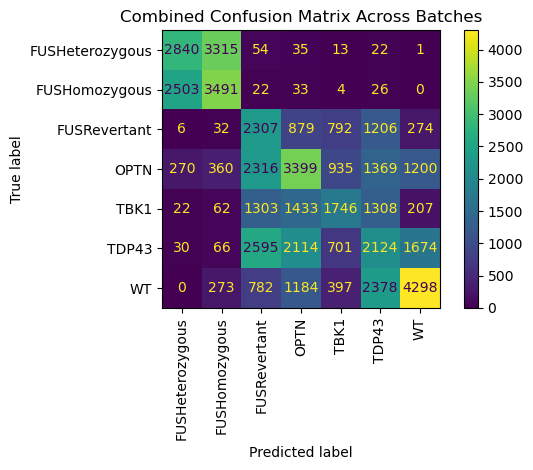


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.880327     0.452229     0.938618 0.500794 0.926386
  FUSHomozygous_Untreated  0.872216     0.574272     0.911316 0.459403 0.942235
   FUSRevertant_Untreated  0.804183     0.419760     0.849227 0.245975 0.925875
           OPTN_Untreated  0.768554     0.345111     0.866563 0.374463 0.851122
           TBK1_Untreated  0.863037     0.287124     0.938644 0.380558 0.909334
          TDP43_Untreated  0.742581     0.228289     0.853609 0.251868 0.836699
             WT_Untreated  0.840270     0.461555     0.922115 0.561536 0.887948
            Macro Average  0.824453     0.395477     0.897156 0.396371 0.897086


In [18]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (50,),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    apply_pca = True,
    pca_components = 100
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.46      0.79      0.58      1222
           1       0.43      0.14      0.22      1245
           2       0.61      0.78      0.69      1015
           3       0.54      0.45      0.49      2314
           4       0.07      0.00      0.01      1876
           5       0.28      0.39      0.33      1699
           6       0.30      0.53      0.38      1561

    accuracy                           0.41     10932
   macro avg       0.39      0.44      0.39     10932
weighted avg       0.37      0.41      0.36     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.80      0.15      0.26        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.04      1.00      0.09         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.68      0.51      0.58        37

    accuracy                           0.17       163
   macro avg       0.22      0.24      0.13       163
weighted avg       0.28      0.17      0.18       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.83      0.20      0.32      1567
           1   

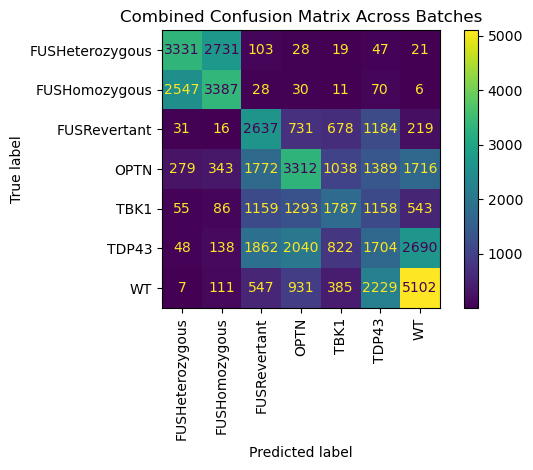


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.887101     0.530414     0.935669 0.528898 0.936035
  FUSHomozygous_Untreated  0.883266     0.557164     0.926061 0.497211 0.940951
   FUSRevertant_Untreated  0.841034     0.479803     0.883360 0.325234 0.935453
           OPTN_Untreated  0.778821     0.336278     0.881251 0.395935 0.851553
           TBK1_Untreated  0.861701     0.293866     0.936248 0.377004 0.909905
          TDP43_Untreated  0.738994     0.183147     0.858993 0.218995 0.829673
             WT_Untreated  0.820519     0.547895     0.879436 0.495484 0.900010
            Macro Average  0.830205     0.418367     0.900145 0.405537 0.900511


In [28]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (100,),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    apply_pca = True,
    pca_components = 200
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.50      0.90      0.65      1222
           1       0.58      0.12      0.20      1245
           2       0.73      0.90      0.80      1015
           3       0.79      0.67      0.72      2314
           4       0.11      0.00      0.00      1876
           5       0.28      0.43      0.34      1699
           6       0.31      0.50      0.38      1561

    accuracy                           0.48     10932
   macro avg       0.47      0.50      0.44     10932
weighted avg       0.46      0.48      0.43     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.05      0.60      0.08         5
           4       0.67      0.15      0.25        13
           5       0.12      0.23      0.16        13
           6       0.53      0.95      0.68        37

    accuracy                           0.27       163
   macro avg       0.24      0.28      0.18       163
weighted avg       0.24      0.27      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.93      0.11      0.20      1567
           1   

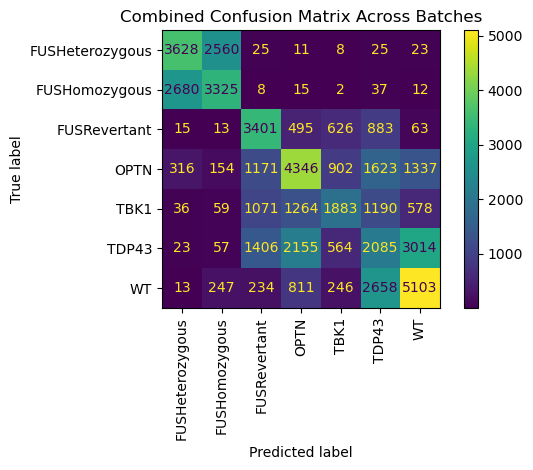


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.890556     0.577707     0.933154 0.540605 0.941957
  FUSHomozygous_Untreated  0.888475     0.546965     0.933293 0.518316 0.940112
   FUSRevertant_Untreated  0.885308     0.618814     0.916533 0.464872 0.953532
           OPTN_Untreated  0.804317     0.441263     0.888348 0.477740 0.872922
           TBK1_Untreated  0.875079     0.309653     0.949309 0.445048 0.912850
          TDP43_Untreated  0.739795     0.224097     0.851127 0.245265 0.835558
             WT_Untreated  0.823744     0.548003     0.883334 0.503751 0.900428
            Macro Average  0.843896     0.466643     0.907871 0.456514 0.908194


In [29]:
from sklearn.neural_network import MLPClassifier
run_baseline_model(
    classifier_class=MLPClassifier,
    classifier_kwargs={
        "hidden_layer_sizes": (100,50),  # You can adjust e.g., (256, 128)
        "activation": "relu",
        "solver": "adam",
        "max_iter": 200,
        "random_state": 42
    },
    apply_pca = False,
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2]
Test: (10932, 5568) Labels: [0 1 2]
2: 9892
0: 12232
1: 19345
              precision    recall  f1-score   support

           0       0.39      0.86      0.53      2576
           1       0.87      0.41      0.56      5889
           2       1.00      1.00      1.00      2467

    accuracy                           0.65     10932
   macro avg       0.75      0.76      0.70     10932
weighted avg       0.78      0.65      0.65     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2]
Test: (8356, 5568) Labels: [0 1 2]
2: 9966
0: 13222
1: 20857
              precision    recall  f1-score   support

           0       0.50      0.86      0.63      1586
           1       0.92      0.69      0.79      4377
           2       1.00      0.99      0.99      2393

    accuracy                           0.81      8356
   macro avg       0.81      0.85      0.81      8356
weighted avg       0.87      0.81      0.82      8356


=== Ba

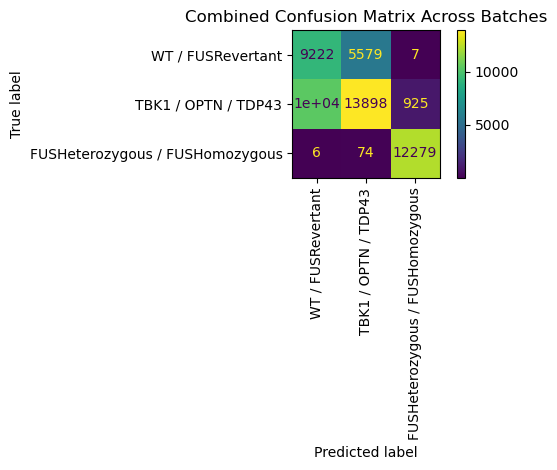


=== Evaluation Metrics ===
        Label  Accuracy  Sensitivity  Specificity      PPV      NPV
            0  0.694605     0.622771     0.722901 0.469576 0.829498
            1  0.675789     0.550765     0.791917 0.710859 0.654916
            2  0.980687     0.993527     0.976724 0.929453 0.997959
Macro Average  0.783694     0.722354     0.830514 0.703296 0.827458


In [24]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'TDP43_Untreated':1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    label_map = label_map
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2]
Test: (10932, 5568) Labels: [0 1 2]
2: 9892
0: 12232
1: 19345
              precision    recall  f1-score   support

           0       0.38      0.89      0.53      2576
           1       0.88      0.35      0.51      5889
           2       1.00      1.00      1.00      2467

    accuracy                           0.63     10932
   macro avg       0.75      0.75      0.68     10932
weighted avg       0.79      0.63      0.62     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2]
Test: (8356, 5568) Labels: [0 1 2]
2: 9966
0: 13222
1: 20857
              precision    recall  f1-score   support

           0       0.46      0.89      0.61      1586
           1       0.93      0.63      0.75      4377
           2       1.00      0.99      1.00      2393

    accuracy                           0.78      8356
   macro avg       0.80      0.84      0.79      8356
weighted avg       0.86      0.78      0.80      8356


=== Ba

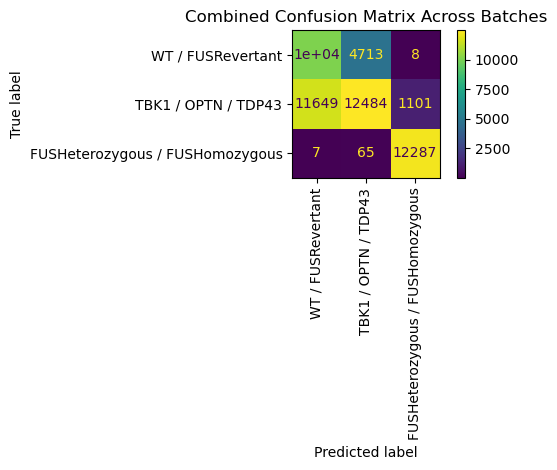


=== Evaluation Metrics ===
        Label  Accuracy  Sensitivity  Specificity      PPV      NPV
            0  0.687468     0.681186     0.689942 0.463919 0.846011
            1  0.665503     0.494729     0.824125 0.723207 0.637155
            2  0.977462     0.994174     0.972304 0.917214 0.998154
Macro Average  0.776811     0.723363     0.828790 0.701447 0.827107


In [25]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'TDP43_Untreated':1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=True,
    norm=False,
    choose_features=False,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    label_map = label_map
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2]
Test: (10932, 5568) Labels: [0 1 2]
2: 9892
0: 12232
1: 19345
Selecting top 100 features...
              precision    recall  f1-score   support

           0       0.19      0.36      0.25      2576
           1       0.54      0.33      0.41      5889
           2       1.00      0.99      1.00      2467

    accuracy                           0.49     10932
   macro avg       0.58      0.56      0.55     10932
weighted avg       0.56      0.49      0.51     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2]
Test: (8356, 5568) Labels: [0 1 2]
2: 9966
0: 13222
1: 20857
Selecting top 100 features...
              precision    recall  f1-score   support

           0       0.25      0.20      0.22      1586
           1       0.72      0.78      0.75      4377
           2       1.00      0.98      0.99      2393

    accuracy                           0.73      8356
   macro avg       0.66      0.65      0.65      8356
we

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.20      1.00      0.33        31
           2       0.83      0.10      0.18        51

    accuracy                           0.22       163
   macro avg       0.34      0.37      0.17       163
weighted avg       0.30      0.22      0.12       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2]
Test: (9550, 5568) Labels: [0 1 2]
2: 9230
0: 12135
1: 21486
Selecting top 100 features...
              precision    recall  f1-score   support

           0       0.25      0.17      0.21      2673
           1       0.52      0.64      0.57      3748
           2       1.00      0.99      1.00      3129

    accuracy                           0.62      9550
   macro avg       0.59      0.60      0.59      9550
weighted avg       0.60      0.62      0.61      9550


=== Batch 9 ===
Train: (43208, 5568) Labels: [0 1 2]
Test: (9193, 5568) Labels: [0 1 2]
2: 1

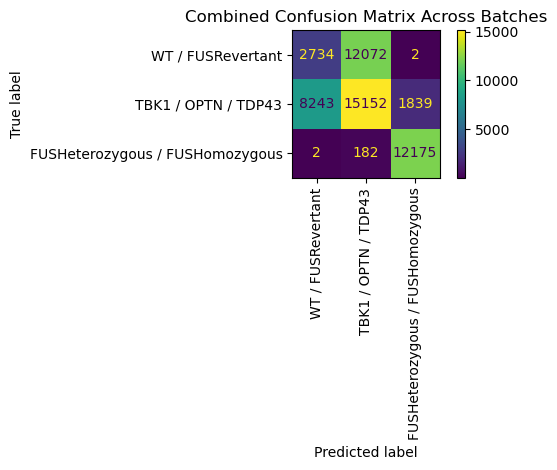


=== Evaluation Metrics ===
        Label  Accuracy  Sensitivity  Specificity      PPV      NPV
            0  0.612240     0.184630     0.780677 0.249021 0.708512
            1  0.573749     0.600460     0.548938 0.552872 0.596639
            2  0.961356     0.985112     0.954023 0.868650 0.995206
Macro Average  0.715782     0.590067     0.761213 0.556848 0.766786


In [26]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'TDP43_Untreated':1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=True,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    label_map = label_map
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2]
Test: (10932, 5568) Labels: [0 1 2]
2: 9892
0: 12232
1: 19345
              precision    recall  f1-score   support

           0       0.27      0.61      0.38      2576
           1       0.63      0.29      0.40      5889
           2       1.00      1.00      1.00      2467

    accuracy                           0.52     10932
   macro avg       0.63      0.63      0.59     10932
weighted avg       0.63      0.52      0.53     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2]
Test: (8356, 5568) Labels: [0 1 2]
2: 9966
0: 13222
1: 20857
              precision    recall  f1-score   support

           0       0.41      0.62      0.50      1586
           1       0.82      0.69      0.75      4377
           2       1.00      0.98      0.99      2393

    accuracy                           0.76      8356
   macro avg       0.75      0.76      0.74      8356
weighted avg       0.80      0.76      0.77      8356


=== Ba

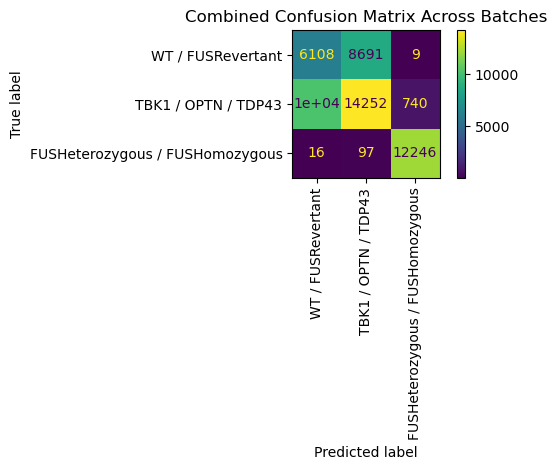


=== Evaluation Metrics ===
        Label  Accuracy  Sensitivity  Specificity      PPV      NPV
            0  0.638213     0.412480     0.727130 0.373213 0.758568
            1  0.622717     0.564794     0.676519 0.618576 0.625966
            2  0.983550     0.990857     0.981295 0.942362 0.997132
Macro Average  0.748160     0.656043     0.794981 0.644717 0.793889


In [27]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 1,
    'TDP43_Untreated':1,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    label_map = label_map,
    apply_pca=True
)

In [ ]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 0,
    'TBK1_Untreated': 1,
    'OPTN_Untreated': 3,
    'TDP43_Untreated':4,
    'FUSHeterozygous_Untreated': 2,
    'FUSHomozygous_Untreated': 2,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=True,
    norm=False,
    choose_features=False,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    label_map = label_map
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4]
Test: (10932, 5568) Labels: [0 1 2 3 4]
2: 9892
0: 12232
3: 7535
1: 4205
4: 7605
              precision    recall  f1-score   support

           0       0.38      0.75      0.50      2576
           1       0.14      0.00      0.01      1876
           2       1.00      1.00      1.00      2467
           3       0.79      0.46      0.58      2314
           4       0.35      0.40      0.37      1699

    accuracy                           0.56     10932
   macro avg       0.53      0.52      0.49     10932
weighted avg       0.56      0.56      0.52     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4]
Test: (8356, 5568) Labels: [0 1 2 3 4]
2: 9966
0: 13222
3: 8200
1: 4861
4: 7796
              precision    recall  f1-score   support

           0       0.48      0.86      0.61      1586
           1       0.69      0.68      0.68      1220
           2       1.00      0.99      0.99      2393
           3     

In [ ]:
# Label mapping
label_map = {
    'WT_Untreated': 0,
    'FUSRevertant_Untreated': 1,
    'TBK1_Untreated': 2,
    'OPTN_Untreated': 3,
    'TDP43_Untreated':4,
    'FUSHeterozygous_Untreated': 5,
    'FUSHomozygous_Untreated': 6,
}

run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={'class_weight':{0: 10, 1: 1.0, 2: 1.0, 3: 1, 4: 1.0, 5: 1.0, 6:1}},
    label_map = label_map
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.66      0.91      0.76      1222
           1       0.87      0.53      0.66      1245
           2       0.81      0.91      0.86      1015
           3       0.79      0.50      0.61      2314
           4       0.13      0.00      0.00      1876
           5       0.28      0.30      0.29      1699
           6       0.28      0.71      0.40      1561

    accuracy                           0.50     10932
   macro avg       0.54      0.55      0.51     10932
weighted avg       0.52      0.50      0.47     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.06      0.80      0.12         5
           4       0.50      0.08      0.13        13
           5       0.07      0.23      0.11        13
           6       0.62      0.97      0.76        37

    accuracy                           0.27       163
   macro avg       0.18      0.30      0.16       163
weighted avg       0.19      0.27      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.81      0.19      0.31      1567
           1   

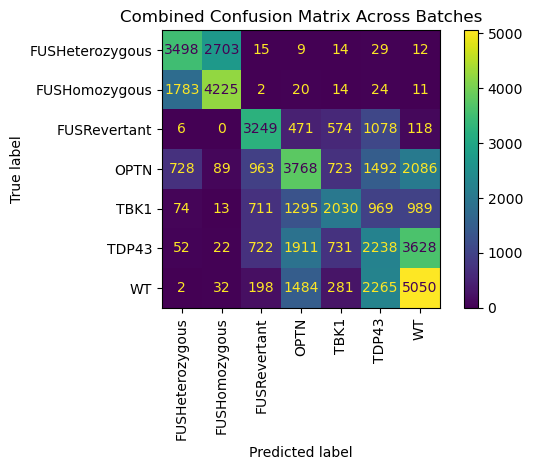


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.896433     0.557006     0.942651 0.569429 0.939859
  FUSHomozygous_Untreated  0.910059     0.695016     0.938280 0.596414 0.959088
   FUSRevertant_Untreated  0.907292     0.591157     0.944334 0.554437 0.951720
           OPTN_Untreated  0.784909     0.382577     0.878032 0.420630 0.860023
           TBK1_Untreated  0.878094     0.333827     0.949547 0.464850 0.915664
          TDP43_Untreated  0.753383     0.240542     0.864097 0.276467 0.840518
             WT_Untreated  0.788057     0.542311     0.841166 0.424584 0.894784
            Macro Average  0.845461     0.477491     0.908301 0.472401 0.908808


In [2]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    apply_pca=False,
    pca_components=50,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    return_proba=False
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      1222
           1       0.87      0.52      0.65      1245
           2       0.77      0.93      0.84      1015
           3       0.79      0.50      0.61      2314
           4       0.21      0.00      0.01      1876
           5       0.28      0.31      0.30      1699
           6       0.28      0.71      0.40      1561

    accuracy                           0.50     10932
   macro avg       0.55      0.56      0.51     10932
weighted avg       0.53      0.50      0.47     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Un

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        44
           3       0.07      0.80      0.12         5
           4       0.50      0.08      0.13        13
           5       0.07      0.23      0.11        13
           6       0.60      0.97      0.74        37

    accuracy                           0.28       163
   macro avg       0.32      0.30      0.17       163
weighted avg       0.34      0.28      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
              precision    recall  f1-score   support

           0       0.81      0.21      0.34      1567
           1   

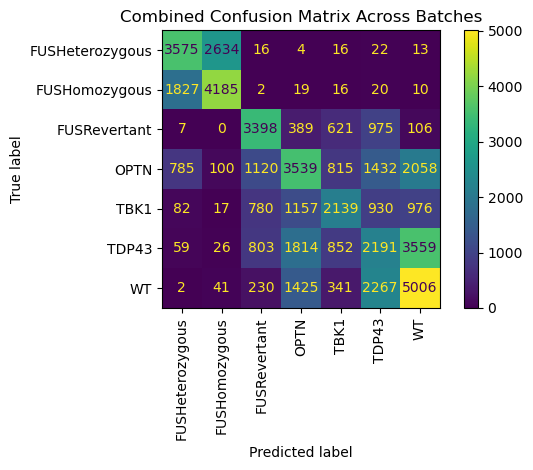


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.895670     0.569268     0.940114 0.564147 0.941277
  FUSHomozygous_Untreated  0.910078     0.688436     0.939165 0.597601 0.958280
   FUSRevertant_Untreated  0.903647     0.618268     0.937086 0.535202 0.954443
           OPTN_Untreated  0.787828     0.359326     0.887009 0.423985 0.856767
           TBK1_Untreated  0.873991     0.351751     0.942552 0.445625 0.917187
          TDP43_Untreated  0.756512     0.235490     0.868993 0.279571 0.840387
             WT_Untreated  0.789546     0.537586     0.843997 0.426842 0.894131
            Macro Average  0.845325     0.480018     0.908417 0.467568 0.908925


In [3]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=True,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Selecting top 10 features...
              precision    recall  f1-score   support

           0       0.44      0.59      0.50      1222
           1       0.38      0.23      0.29      1245
           2       0.16      0.12      0.14      1015
           3       0.20      0.07      0.11      2314
           4       0.22      0.09      0.13      1876
           5       0.26      0.05      0.08      1699
           6       0.11      0.41      0.17      1561

    accuracy                           0.20     10932
   macro avg       0.25      0.22      0.20     10932
weighted avg       0.24      0.20      0.18     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        26
           1       0.14      0.76      0.24        25
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        37

    accuracy                           0.13       163
   macro avg       0.06      0.13      0.06       163
weighted avg       0.06      0.13      0.06       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Selecting top 10 features...
              precision    recall  f1-score   support

           0       0.49      0.51      0

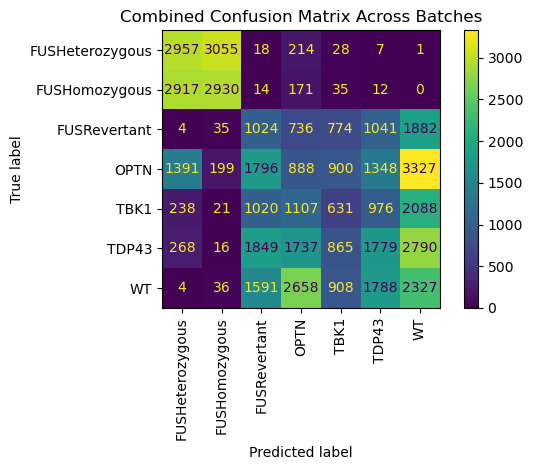


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.844564     0.470860     0.895449 0.380126 0.925530
  FUSHomozygous_Untreated  0.875747     0.481987     0.927421 0.465671 0.931705
   FUSRevertant_Untreated  0.794660     0.186317     0.865942 0.140044 0.900818
           OPTN_Untreated  0.702601     0.090161     0.844355 0.118227 0.800379
           TBK1_Untreated  0.829011     0.103766     0.924223 0.152379 0.887070
          TDP43_Untreated  0.757695     0.191208     0.879992 0.255934 0.834433
             WT_Untreated  0.674186     0.249893     0.765880 0.187435 0.825314
            Macro Average  0.782638     0.253456     0.871894 0.242831 0.872179


In [6]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=True,
    norm=False,
    choose_features=True,
    top_k=10,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Selecting top 1000 features...
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      1222
           1       0.77      0.35      0.48      1245
           2       0.55      0.67      0.61      1015
           3       0.52      0.49      0.50      2314
           4       0.06      0.01      0.01      1876
           5       0.28      0.17      0.21      1699
           6       0.21      0.52      0.30      1561

    accuracy                           0.41     10932
   macro avg       0.42      0.44      0.40     10932
weighted avg       0.40      0.41      0.37     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        26
           1       1.00      0.12      0.21        25
           2       0.00      0.00      0.00        44
           3       0.04      1.00      0.08         5
           4       0.00      0.00      0.00        13
           5       0.05      0.08      0.06        13
           6       0.89      0.46      0.61        37

    accuracy                           0.17       163
   macro avg       0.43      0.25      0.16       163
weighted avg       0.52      0.17      0.20       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Selecting top 1000 features...
              precision    recall  f1-score   support

           0       0.67      0.04     

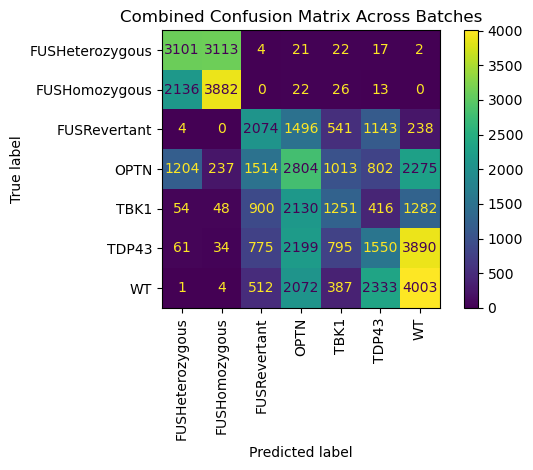


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.873304     0.493790     0.924980 0.472641 0.930650
  FUSHomozygous_Untreated  0.892502     0.638592     0.925824 0.530473 0.951268
   FUSRevertant_Untreated  0.863991     0.377365     0.921011 0.358886 0.926601
           OPTN_Untreated  0.714032     0.284699     0.813405 0.260983 0.830881
           TBK1_Untreated  0.854697     0.205723     0.939896 0.310037 0.900136
          TDP43_Untreated  0.761875     0.166595     0.890387 0.247051 0.831899
             WT_Untreated  0.751989     0.429875     0.821602 0.342429 0.869593
            Macro Average  0.816056     0.370948     0.891015 0.360357 0.891575


In [7]:
## Baseline
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=True,
    top_k=1000,
    label_map=None,
    apply_pca = True,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Selecting top 5 features...


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.44      0.55      0.49      1222
           1       0.42      0.29      0.34      1245
           2       0.00      0.00      0.00      1015
           3       0.26      0.15      0.19      2314
           4       0.07      0.00      0.00      1876
           5       0.21      0.33      0.25      1699
           6       0.14      0.40      0.21      1561

    accuracy                           0.24     10932
   macro avg       0.22      0.25      0.21     10932
weighted avg       0.22      0.24      0.20     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5049
FUSHomozygous_Untreated: 4917
FUSRevertant_Untreated: 4696
OPTN_Untreated: 8200
TBK1_Untreated: 4861
TDP43_Untreated: 7796
WT_Untreated: 8526
Selecting top 5 features...
              precision    recall  f1-score   support

           0       0.41      0.06      0.

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.49      0.15      0.23      1004
           1       0.45      0.76      0.56       800
           2       0.00      0.00      0.00      1131
           3       0.17      0.15      0.16      1103
           4       0.07      0.00      0.00      1045
           5       0.18      0.53      0.27       930
           6       0.21      0.36      0.26       918

    accuracy                           0.25      6931
   macro avg       0.22      0.28      0.21      6931
weighted avg       0.21      0.25      0.19      6931


=== Batch 7 ===
Train: (52238, 5568) Labels: [0 1 2 3 4 5 6]
Test: (163, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6254
FUSHomozygous_Untreated: 6054
FUSRevertant_Untreated: 5452
OPTN_Untreated: 9844
TBK1_Untreated: 6068
TDP43_Untreated: 9291
WT_Untreated: 9275
Selecting top 5 features...


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.13      0.72      0.23        25
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        37

    accuracy                           0.11       163
   macro avg       0.02      0.10      0.03       163
weighted avg       0.02      0.11      0.03       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Selecting top 5 features...
              precision    recall  f1-score   support

           0       0.47      0.59      0.

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.35      0.97      0.51       963
           1       0.16      0.13      0.15       619
           2       0.19      0.01      0.01      1298
           3       0.01      0.04      0.02      1586
           4       0.00      0.00      0.00       984
           5       0.00      0.00      0.00      1439
           6       0.15      0.01      0.01      2304

    accuracy                           0.12      9193
   macro avg       0.12      0.17      0.10      9193
weighted avg       0.11      0.12      0.07      9193


=== Batch 10 ===
Train: (45125, 5568) Labels: [0 1 2 3 4 5 6]
Test: (7276, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 6013
FUSHomozygous_Untreated: 5413
FUSRevertant_Untreated: 5451
OPTN_Untreated: 8086
TBK1_Untreated: 5893
TDP43_Untreated: 7153
WT_Untreated: 7116
Selecting top 5 features...


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.23      0.46      0.31       267
           1       0.66      0.35      0.46       666
           2       0.00      0.00      0.00        45
           3       0.26      0.30      0.28      1763
           4       0.00      0.00      0.00       188
           5       0.36      0.39      0.38      2151
           6       0.41      0.38      0.40      2196

    accuracy                           0.35      7276
   macro avg       0.28      0.27      0.26      7276
weighted avg       0.36      0.35      0.35      7276


=== Overall Accuracy ===
0.2329581302927753 [0.23609586534943286, 0.26627573001436095, 0.25046890780551145, 0.11042944785276074, 0.2959162303664922, 0.1200913738714239, 0.35142935678944476]


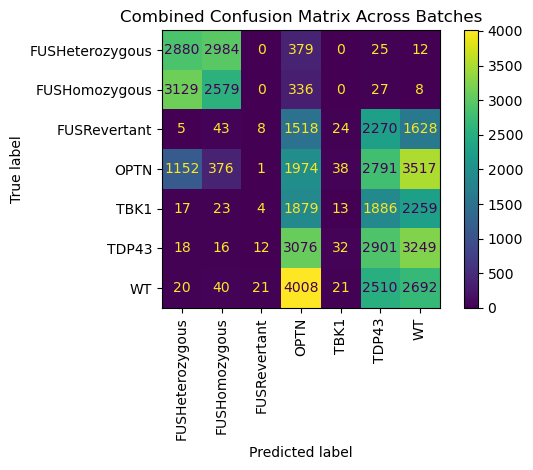


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.852274     0.458599     0.905878 0.398837 0.924745
  FUSHomozygous_Untreated  0.866758     0.424247     0.924831 0.425507 0.924471
   FUSRevertant_Untreated  0.894544     0.001456     0.999190 0.173913 0.895177
           OPTN_Untreated  0.636057     0.200426     0.736887 0.149886 0.799266
           TBK1_Untreated  0.882006     0.002138     0.997517 0.101562 0.883917
          TDP43_Untreated  0.696342     0.311801     0.779358 0.233763 0.839889
             WT_Untreated  0.669987     0.289089     0.752303 0.201422 0.830413
            Macro Average  0.785424     0.241108     0.870852 0.240699 0.871126


In [8]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=True,
    top_k=5,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)


=== Batch 1 ===
Train: (41469, 5568) Labels: [0 1 2 3 4 5 6]
Test: (10932, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 5058
FUSHomozygous_Untreated: 4834
FUSRevertant_Untreated: 4481
OPTN_Untreated: 7535
TBK1_Untreated: 4205
TDP43_Untreated: 7605
WT_Untreated: 7751
Selecting top 20 features...
              precision    recall  f1-score   support

           0       0.47      0.73      0.57      1222
           1       0.41      0.16      0.23      1245
           2       0.19      0.03      0.05      1015
           3       0.17      0.20      0.18      2314
           4       0.08      0.00      0.00      1876
           5       0.26      0.10      0.14      1699
           6       0.10      0.31      0.15      1561

    accuracy                           0.20     10932
   macro avg       0.24      0.22      0.19     10932
weighted avg       0.22      0.20      0.18     10932


=== Batch 2 ===
Train: (44045, 5568) Labels: [0 1 2 3 4 5 6]
Test: (8356, 5568) Labels: [0 1 

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

           0       0.50      0.15      0.24        26
           1       0.13      0.72      0.23        25
           2       0.00      0.00      0.00        44
           3       0.05      0.20      0.08         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        37

    accuracy                           0.14       163
   macro avg       0.10      0.15      0.08       163
weighted avg       0.10      0.14      0.07       163


=== Batch 8 ===
Train: (42851, 5568) Labels: [0 1 2 3 4 5 6]
Test: (9550, 5568) Labels: [0 1 2 3 4 5 6]
FUSHeterozygous_Untreated: 4713
FUSHomozygous_Untreated: 4517
FUSRevertant_Untreated: 4333
OPTN_Untreated: 8420
TBK1_Untreated: 5326
TDP43_Untreated: 7740
WT_Untreated: 7802
Selecting top 20 features...
              precision    recall  f1-score   support

           0       0.49      0.51      0

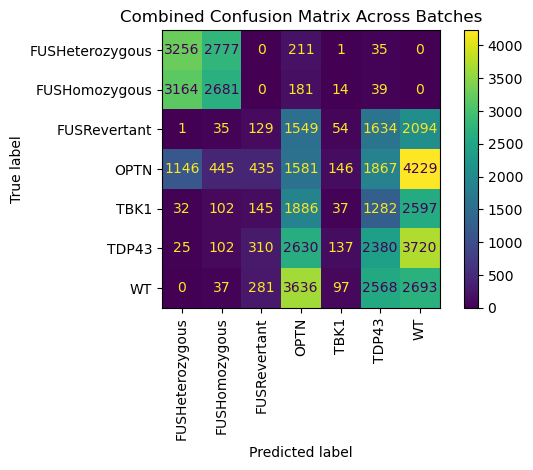


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV
FUSHeterozygous_Untreated  0.858934     0.518471     0.905293 0.427072 0.932465
  FUSHomozygous_Untreated  0.868399     0.441026     0.924485 0.433889 0.926485
   FUSRevertant_Untreated  0.875231     0.023472     0.975035 0.099231 0.894973
           OPTN_Untreated  0.649606     0.160524     0.762808 0.135429 0.796990
           TBK1_Untreated  0.876090     0.006085     0.990307 0.076132 0.883579
          TDP43_Untreated  0.726169     0.255804     0.827714 0.242733 0.837450
             WT_Untreated  0.632469     0.289197     0.706654 0.175634 0.821436
            Macro Average  0.783843     0.242083     0.870328 0.227160 0.870483


In [9]:
run_baseline_model(
    batches=[1, 2, 3, 7, 8, 9, 10],
    balance=False,
    norm=False,
    choose_features=True,
    top_k=20,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)